In [1]:
import numpy
numpy.version.version

'1.20.1'

In [7]:
import pandas as pd
encoding = 'utf-8'

papers=pd.read_csv('N:\\Bibliometric_Germany\\KB data\\processed\\new_2021_April\\04_all_records_Text.csv',encoding=encoding)

In [39]:
# for authors_based topic modeling
import pandas as pd
encoding = 'utf-8'
papers=pd.read_csv('N:\\Bibliometric_Germany\\KB data\\processed\\new_2021_Feb\\05_authors_kwtitjour_for_topic.csv',encoding=encoding)

In [1]:
# for complement data (country number 4-6)
import pandas as pd
encoding = 'utf-8'

papers=pd.read_csv('N:\\Bibliometric_Germany\\KB data\\processed\\new_2021_April\\04_all_records_Text_add.csv',encoding=encoding)

In [2]:
papers

,Unnamed: 0,AUTHOR_ID_NEW,Text
0,0,6.503941e+09,"Mothers matter! Maternal support, dominance st..."
1,1,6.503994e+09,Lysyl oxidase expression is an independent mar...
2,2,6.504015e+09,On general features of warm dark matter with r...
3,3,6.504040e+09,Bringing parliaments back in the sources of po...
4,4,6.504121e+09,An experimental and numerical investigation on...
...,...,...,...
19356,19356,5.721629e+10,Resistance of Escherichia coli and Salmonella ...
19357,19357,5.721629e+10,Effect of ecological factors on the inhibitory...
19358,19358,5.721629e+10,Effect of bacteriocin-producing lactobacilli o...
19359,19359,5.721629e+10,The first low molecular weight antibiotic from...


In [38]:
papers.AUTHOR_ID_NEW.nunique()

1513630

In [18]:
# for old data
import pandas as pd
encoding = 'utf-8'
disambiguated=pd.read_csv('N:\\Bibliometric_Germany\\KB data\\processed\\new_2021_April\\06_all_records_1996_2020_disambiguated_text.csv',encoding=encoding)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
disambiguated_author=disambiguated[['AUTHOR_ID_NEW', 'Text']]
disambiguated_author=disambiguated_author.groupby(by='AUTHOR_ID_NEW').apply(lambda x:' '.join(x['Text']))
disambiguated_author

AUTHOR_ID_NEW
1.001000e+00    Settlements and separation in the West Bank: F...
2.002000e+00    Radiation damage and single event effect resul...
2.003000e+00    Efficacy of domestic bisoprolol,enalapril and ...
8.002000e+00    Measurement of the proton structure function F...
8.006000e+00    Charged-particle multiplicities in pp interact...
                                      ...                        
5.721644e+10    Who loves virtue as much as he loves beauty?: ...
5.721644e+10    Quantifying the Overall Survival Benefit With ...
5.721644e+10    Time-unfolding object existence detection in l...
5.721644e+10    L-equivalence for degree five elliptic curves,...
5.721644e+10    The Role of Diphenyl Carbonate Additive on the...
Length: 344578, dtype: object

In [29]:
disambiguated_author.AUTHOR_ID_NEW.nunique()

344578

In [23]:
disambiguated_author=disambiguated_author.to_frame().reset_index()
disambiguated_author.rename(columns={0:'Text'},inplace=True)
disambiguated_author

,AUTHOR_ID_NEW,Text
0,1.001000e+00,Settlements and separation in the West Bank: F...
1,2.002000e+00,Radiation damage and single event effect resul...
2,2.003000e+00,"Efficacy of domestic bisoprolol,enalapril and ..."
3,8.002000e+00,Measurement of the proton structure function F...
4,8.006000e+00,Charged-particle multiplicities in pp interact...
...,...,...
344573,5.721644e+10,Who loves virtue as much as he loves beauty?: ...
344574,5.721644e+10,Quantifying the Overall Survival Benefit With ...
344575,5.721644e+10,Time-unfolding object existence detection in l...
344576,5.721644e+10,"L-equivalence for degree five elliptic curves,..."


In [11]:
pd.set_option('max_colwidth',100)
pd.set_option('float_format', lambda x: '%.6f' % x)
papers

,AUTHOR_ID_NEW,Text
0,6503845403.000000,About the differentiation of the podotrochlear syndrome with the aid of diagnostic anaesthesia a...
1,6503845461.000000,Timber structure of a storage hall for cut timbers. Rules and non-rules - The story of a retrogr...
2,6503845493.000000,Fusion rules for the continuum sectors of the Virasoro algebra with c = 1 Letters in Mathematica...
3,6503845540.000000,Cutaneous infiltrates of myelogenous leukemia in association with pre-existing skin diseases (mu...
4,6503845628.000000,New equation for the evaluation of standard addition experiments applied to ion chromatography M...
...,...,...
1435472,57216450803.000000,Six months follow-up of protected high-risk percutaneous coronary intervention with the microaxi...
1435473,57216450995.000000,Expanded polyamide 12 bead foams (ePA) thermo-mechanical properties of molded parts AIP Conferen...
1435474,57216451296.000000,Connecting Diffraction-Based Strain with Macroscopic Stresses in Laser Powder Bed Fused Ti-6Al-4...
1435475,57216451394.000000,Growing a circular economy with fungal biotechnology: A white paper Fungal Biology and Biotechno...


In [3]:
papers.drop(columns="Unnamed: 0",inplace=True)

In [ ]:
#1 Remove punctuation/lower casing

In [4]:
# Load the regular expression library
import re


# Remove punctuation
papers['Text_processed'] = \
papers['Text'].map(lambda x: re.sub('[,\.!?:-]', '', x))

# Convert the titles to lowercase
papers['Text_processed'] = \
papers['Text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['Text_processed'].head()

0    mothers matter maternal support dominance stat...
1    lysyl oxidase expression is an independent mar...
2    on general features of warm dark matter with r...
3    bringing parliaments back in the sources of po...
4    an experimental and numerical investigation on...
Name: Text_processed, dtype: object

In [5]:
papers

,AUTHOR_ID_NEW,Text,Text_processed
0,6.503941e+09,"Mothers matter! Maternal support, dominance st...",mothers matter maternal support dominance stat...
1,6.503994e+09,Lysyl oxidase expression is an independent mar...,lysyl oxidase expression is an independent mar...
2,6.504015e+09,On general features of warm dark matter with r...,on general features of warm dark matter with r...
3,6.504040e+09,Bringing parliaments back in the sources of po...,bringing parliaments back in the sources of po...
4,6.504121e+09,An experimental and numerical investigation on...,an experimental and numerical investigation on...
...,...,...,...
19356,5.721629e+10,Resistance of Escherichia coli and Salmonella ...,resistance of escherichia coli and salmonella ...
19357,5.721629e+10,Effect of ecological factors on the inhibitory...,effect of ecological factors on the inhibitory...
19358,5.721629e+10,Effect of bacteriocin-producing lactobacilli o...,effect of bacteriocinproducing lactobacilli on...
19359,5.721629e+10,The first low molecular weight antibiotic from...,the first low molecular weight antibiotic from...


In [7]:
# sample a part of them 
#papers=papers.drop_duplicates(["PK_ITEMS"])
papers_ori=papers

papers=papers.sample(100000)

In [40]:
# all authors: 
papers=papers.drop(columns={"Unnamed: 0"})
papers_ori=papers

In [ ]:
#2 word map for explantory analysis (looking for some irrealted but frequent word)

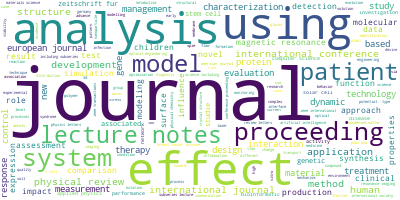

In [8]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
sample=papers.sample(5000)
long_string = ','.join(list(sample['Text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=800, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [ ]:
#3 tokenize word and remove stopwrod and lemmatization

In [9]:
papers=papers_ori

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\zhao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words.extend(['system', 'effect', 'science', 'journal','notes', 'proceeding','lecture','analysis','method','study'\
                   ,'based','using','human','notes','control','research','from','use',"international","conference","assay"])

In [9]:
import site
site.getsitepackages()


['C:\\ProgramData\\Anaconda3',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages']

In [10]:
#*******IMPORTANT : look for spacy installation address (should be in the address get by site.getsitepackages() )
# terminal : python -m spacy validate

import spacy 

nlp = spacy.load("en_core_web_sm")

In [20]:
import gensim
from gensim.utils import simple_preprocess
import time

time_start=time.time()



def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]



def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


data = papers.Text_processed.values.tolist()
data_words = list(sent_to_words(data))
time_end=time.time()
print('time cost of sent_to_word',time_end-time_start,'s')

#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_words = lemmatization(data_words , allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
time_end=time.time()
print('time cost of lemmatization',time_end-time_start,'s')


# remove stop words
data_words = remove_stopwords(data_words)
time_end=time.time()
print('time cost of stop_word',time_end-time_start,'s')

time cost of sent_to_word 1372.088669538498 s
time cost of lemmatization 63603.95859050751 s
time cost of stop_word 64896.13760495186 s


In [ ]:
time cost of sent_to_word 2085.8965978622437 s
time cost of lemmatization 146126.5175535679 s
time cost of stop_word 148109.78171515465 s

In [10]:
m=[["died",'happily',"picked"]]
lemmatization(m , allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

[['die', 'happily', 'pick']]

In [ ]:
# learn about the dimension

In [15]:
import numpy as np

L = np.array(data_words)
print(L.shape)
 
print(L.shape[0]) 


(1435477,)
1435477


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
L[50][:4]

['plasmonic', 'painter', 'color', 'mix']

In [ ]:
# 4 Creating Bigram and Trigram Models

# how it works and how to cacluate the threshold:
#https://datascience.stackexchange.com/questions/25524/how-does-phrases-in-gensim-work
#https://radimrehurek.com/gensim/models/phrases.html?highlight=phrases#module-gensim.models.phrases

In [21]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=20)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(bigram_mod[data_words[50]])
print(trigram_mod[bigram_mod[data_words[50]]])

['novel', 'competence', 'gene', 'comp', 'essential', 'natural', 'transformation', 'acinetobacter', 'sp', 'strain', 'bd', 'apply', 'environmental', 'microbiology']
['novel', 'competence', 'gene', 'comp', 'essential', 'natural', 'transformation', 'acinetobacter_sp', 'strain', 'bd', 'apply', 'environmental_microbiology']


In [22]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]




data_words_bigrams = make_bigrams(data_words)
data_words_trigrams=  make_trigrams(data_words)
data_lemmatized =data_words_trigrams
#data_lemmatized = lemmatization(data_words_trigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [23]:
import pickle

with open("N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/data_lemmatized.txt", "wb") as fp:
    pickle.dump(data_lemmatized, fp)

#  load list data
#with open("test.txt", "rb") as fp:
    #b = pickle.load(fp)

In [24]:
#  load list data

import pickle
with open("N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/data_lemmatized.txt", "rb") as fp:
    data_lemmatized = pickle.load(fp)
    
   
    

In [25]:
with open("N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/data_words.txt", "wb") as fp:
    pickle.dump(data_words, fp)

In [ ]:
#5  Data transformation: Corpus and Dictionary


In [22]:
import gensim.corpora as corpora
time_start=time.time()

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)
id2word.filter_extremes(no_below=10, no_above=0.2)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
time_end=time.time()
print('time cost of corpus',time_end-time_start,'s')

# View
print(corpus[:1][0][:])

time cost of corpus 1071.4966733455658 s
[(0, 1), (1, 2), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1)]


In [40]:
import os
# pickle
#dic_path = os.path.join('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/dic')
#id2word.save( dic_path )

#save corpus
temp_file = "N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/Corpus"
corpora.MmCorpus.serialize(temp_file, corpus)

In [ ]:
#*****************************************

In [ ]:
#***************************************************************
#used for dection of the discipline of the records

In [24]:
# Load the regular expression library
import re


# Remove punctuation
disambiguated_author['Text_processed'] = \
disambiguated_author['Text'].map(lambda x: re.sub('[,\.!?:-]', '', x))

# Convert the titles to lowercase
disambiguated_author['Text_processed'] = \
disambiguated_author['Text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
disambiguated_author['Text_processed'].head(10)

0    settlements and separation in the west bank fu...
1    radiation damage and single event effect resul...
2    efficacy of domestic bisoprololenalapril and n...
3    measurement of the proton structure function f...
4    chargedparticle multiplicities in pp interacti...
5    first observation of the decay τ−k−ηντ physica...
6    surviving sepsis campaign international guidel...
7    active compensation of magnetic field distorti...
8    measurement of beauty and charm production in ...
9    south korea handbook of research on asian entr...
Name: Text_processed, dtype: object

In [19]:
#***************************************************************
#used for dection of the discipline of the records

# get corpus for each record

import gensim
from gensim.utils import simple_preprocess
import time

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def get_corpus(data):
    texts_out = []
    data_words = gensim.utils.simple_preprocess(str(data), deacc=True)
    
    doc = nlp(" ".join(data_words)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV']])
    #data_words = lemmatization(data_words , allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

    data_words = [[word for word in simple_preprocess(str(data_words)) if word not in stop_words]]
    
    # Build the bigram and trigram models
    bigram = gensim.models.Phrases(data_words, min_count=5, threshold=50) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[data_words], threshold=20)  

    # Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    
    data_words_bigrams = [bigram_mod[doc] for doc in data_words]
    data_words_trigrams=  [trigram_mod[bigram_mod[doc]] for doc in data_words]
    corpus = [id2word.doc2bow(text) for text in data_words_trigrams]
    
    return corpus

#**********************************************************

# not used for building LDA model

In [121]:

d=test.iloc[0].Text_processed

d

'synthesis of dimethyl carbonate from carbon dioxide and methanol over cexzr1xo2 and [emim]br/ce05zr 05o2 industrial and engineering chemistry research  '

In [ ]:
#6 Basic model (using 20 topics)

In [46]:
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=20,
                                       chunksize=100,
                                       workers=30,
                                       passes=2,
                                       per_word_topics=True)

In [47]:
from pprint import pprint

pprint(lda_model.print_topics(num_topics=-1))
doc_lda = lda_model[corpus]

[(0,
  '0.021*"cancer" + 0.021*"breast_cancer" + 0.021*"risk" + 0.016*"health" + '
  '0.011*"exposure" + 0.011*"food" + 0.010*"assessment" + 0.008*"nutrition" + '
  '0.007*"environmental" + 0.007*"test"'),
 (1,
  '0.024*"engineering" + 0.015*"laser" + 0.014*"power" + 0.014*"design" + '
  '0.012*"simulation" + 0.011*"technology" + 0.011*"energy" + '
  '0.010*"application" + 0.010*"measurement" + 0.009*"model"'),
 (2,
  '0.020*"cardiac" + 0.020*"heart" + 0.019*"cardiovascular" + 0.017*"disease" '
  '+ 0.016*"patient" + 0.015*"clinical" + 0.010*"cardiology" + '
  '0.008*"heart_failure" + 0.008*"infection" + 0.007*"function"'),
 (3,
  '0.050*"chemistry" + 0.035*"chemical" + 0.031*"structure" + '
  '0.028*"synthesis" + 0.017*"complex" + 0.015*"molecular" + 0.013*"organic" + '
  '0.013*"crystal" + 0.013*"reaction" + 0.009*"structural"'),
 (4,
  '0.027*"water" + 0.019*"model" + 0.016*"atmospheric" + 0.008*"surface" + '
  '0.007*"climate" + 0.007*"earth" + 0.006*"new" + 0.006*"environmental" +

In [ ]:
#6.1 Analysis for LDA model

In [38]:
papers.reset_index(inplace=True)
papers

,index,AUTHOR_ID_NEW,Text,Text_processed
0,0,6503845403.000000,About the differentiation of the podotrochlear syndrome with the aid of diagnostic anaesthesia a...,about the differentiation of the podotrochlear syndrome with the aid of diagnostic anaesthesia a...
1,1,6503845461.000000,Timber structure of a storage hall for cut timbers. Rules and non-rules - The story of a retrogr...,timber structure of a storage hall for cut timbers rules and nonrules the story of a retrogress...
2,2,6503845493.000000,Fusion rules for the continuum sectors of the Virasoro algebra with c = 1 Letters in Mathematica...,fusion rules for the continuum sectors of the virasoro algebra with c = 1 letters in mathematica...
3,3,6503845540.000000,Cutaneous infiltrates of myelogenous leukemia in association with pre-existing skin diseases (mu...,cutaneous infiltrates of myelogenous leukemia in association with preexisting skin diseases (mul...
4,4,6503845628.000000,New equation for the evaluation of standard addition experiments applied to ion chromatography M...,new equation for the evaluation of standard addition experiments applied to ion chromatography m...
...,...,...,...,...
1435472,1435472,57216450803.000000,Six months follow-up of protected high-risk percutaneous coronary intervention with the microaxi...,six months followup of protected highrisk percutaneous coronary intervention with the microaxial...
1435473,1435473,57216450995.000000,Expanded polyamide 12 bead foams (ePA) thermo-mechanical properties of molded parts AIP Conferen...,expanded polyamide 12 bead foams (epa) thermomechanical properties of molded parts aip conferenc...
1435474,1435474,57216451296.000000,Connecting Diffraction-Based Strain with Macroscopic Stresses in Laser Powder Bed Fused Ti-6Al-4...,connecting diffractionbased strain with macroscopic stresses in laser powder bed fused ti6al4v m...
1435475,1435475,57216451394.000000,Growing a circular economy with fungal biotechnology: A white paper Fungal Biology and Biotechno...,growing a circular economy with fungal biotechnology a white paper fungal biology and biotechnol...


In [ ]:
# show topics for each sentence



def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_3 in enumerate(ldamodel[corpus]):
        row=row_3[0]
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    #contents = texts
    sent_topics_df = pd.concat([texts,sent_topics_df], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=papers)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.drop(columns={'Unnamed: 0','index'},inplace=True)
# Show
df_dominant_topic.head(10)

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
#sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

In [20]:
import os
import pickle 
from gensim.test.utils import datapath

# Save model to disk.
temp_file = "N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result"
model_path = os.path.join('N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/model_basic_'+str(26))
lda_model.save(model_path)

# Load a potentially pretrained model from disk.
#lda = LdaModel.load(temp_file)

dic_path = os.path.join('N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/dic')
id2word.save( dic_path )

In [5]:
#load model and dic
import gensim
import gensim.corpora as corpora
import os
lda_model = gensim.models.ldamodel.LdaModel.load('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/model_0.11_0.31_30')

dic_path = os.path.join('N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/dic')
id2word = corpora.Dictionary.load(dic_path)

In [23]:
#save corpus
temp_file = "N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/Corpus"
corpora.MmCorpus.serialize(temp_file, corpus)

In [4]:
#load corpus
import gensim.corpora as corpora
temp_file = "N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/Corpus"
corpus = corpora.MmCorpus(temp_file)

In [ ]:
#7 Compute Model Perplexity and Coherence Score 

In [48]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.6142821243660235


In [ ]:
# 8 Hyperparameter tuning

In [30]:
# supporting function
from gensim.models import CoherenceModel
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           chunksize=100,
                                           workers=30,
                                           passes=2,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [10]:
import numpy as np
import tqdm
import time

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 20
max_topics = 40
step_size = 2
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 0.5, 0.2))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(corpus_title)))
    m=1
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    
                    time_start=time.time()                    
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    time_end=time.time()
                    print("finish:",m)
                    print('time cost:',time_end-time_start,'s')
                    m=m+1
                    pbar.update(1)
    
    
    df = pd.DataFrame.from_dict(model_results, orient='index')
    df = df.transpose()
    df.drop(columns=["Topics"],inplace=True)
    df.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/lda_tuning_results.csv', index=False)
    pbar.close()


  0%|                                                                                        | 0/50 [11:17:55<?, ?it/s]

  2%|█▍                                                                        | 1/50 [3:45:08<183:51:37, 13508.11s/it]

finish: 1
time cost: 13508.110346078873 s



  4%|██▉                                                                       | 2/50 [7:27:44<178:54:54, 13418.64s/it]

finish: 2
time cost: 13356.004479408264 s



  6%|████▍                                                                    | 3/50 [11:08:05<174:00:36, 13328.44s/it]

finish: 3
time cost: 13221.091505765915 s



  8%|█████▊                                                                   | 4/50 [14:49:30<170:05:21, 13311.34s/it]

finish: 4
time cost: 13285.132956266403 s



 10%|███████▎                                                                 | 5/50 [18:28:25<165:35:58, 13247.98s/it]

finish: 5
time cost: 13135.616859197617 s



 12%|████████▊                                                                | 6/50 [22:17:04<163:52:32, 13408.01s/it]

finish: 6
time cost: 13718.654855251312 s



 14%|██████████▏                                                              | 7/50 [26:03:05<160:44:49, 13457.89s/it]

finish: 7
time cost: 13560.580054998398 s



 16%|███████████▋                                                             | 8/50 [29:41:45<155:45:23, 13350.56s/it]

finish: 8
time cost: 13120.753577947617 s



 18%|█████████████▏                                                           | 9/50 [33:29:06<153:04:49, 13441.22s/it]

finish: 9
time cost: 13640.548409938812 s



 20%|██████████████▍                                                         | 10/50 [37:24:41<151:43:36, 13655.41s/it]

finish: 10
time cost: 14135.029016971588 s



 22%|███████████████▊                                                        | 11/50 [39:54:40<132:29:42, 12230.31s/it]

finish: 11
time cost: 8999.00019955635 s



 24%|█████████████████▎                                                      | 12/50 [42:20:20<117:53:19, 11168.41s/it]

finish: 12
time cost: 8739.64564538002 s



 26%|██████████████████▋                                                     | 13/50 [44:46:34<107:19:55, 10443.12s/it]

finish: 13
time cost: 8774.197402954102 s



 28%|████████████████████▏                                                   | 14/50 [47:21:19<100:56:02, 10093.40s/it]

finish: 14
time cost: 9285.29126238823 s



 30%|██████████████████████▏                                                   | 15/50 [49:43:13<93:30:06, 9617.33s/it]

finish: 15
time cost: 8514.014330625534 s



 32%|███████████████████████▋                                                  | 16/50 [51:57:48<86:26:45, 9153.10s/it]

finish: 16
time cost: 8075.051941871643 s



 34%|█████████████████████████▏                                                | 17/50 [54:04:28<79:37:13, 8685.86s/it]

finish: 17
time cost: 7599.236463069916 s



 36%|██████████████████████████▋                                               | 18/50 [56:11:37<74:23:05, 8368.29s/it]

finish: 18
time cost: 7629.028728246689 s



 38%|████████████████████████████                                              | 19/50 [58:19:05<70:11:55, 8152.11s/it]

finish: 19
time cost: 7648.492323637009 s



 40%|█████████████████████████████▌                                            | 20/50 [60:26:58<66:44:09, 8008.30s/it]

finish: 20
time cost: 7673.144482135773 s



 42%|███████████████████████████████                                           | 21/50 [62:35:45<63:49:54, 7923.96s/it]

finish: 21
time cost: 7727.307830095291 s



 44%|████████████████████████████████▌                                         | 22/50 [64:43:52<61:04:32, 7852.58s/it]

finish: 22
time cost: 7686.121270418167 s



 46%|██████████████████████████████████                                        | 23/50 [66:51:23<58:26:33, 7792.35s/it]

finish: 23
time cost: 7651.870524406433 s



 48%|███████████████████████████████████▌                                      | 24/50 [68:59:58<56:06:36, 7769.10s/it]

finish: 24
time cost: 7714.873350858688 s



 50%|█████████████████████████████████████                                     | 25/50 [71:17:06<54:54:30, 7906.82s/it]

finish: 25
time cost: 8228.08661532402 s



 52%|██████████████████████████████████████▍                                   | 26/50 [73:27:42<52:34:11, 7885.46s/it]

finish: 26
time cost: 7835.631231546402 s



 54%|███████████████████████████████████████▉                                  | 27/50 [75:37:42<50:12:51, 7859.65s/it]

finish: 27
time cost: 7799.4229388237 s



 56%|█████████████████████████████████████████▍                                | 28/50 [77:48:38<48:01:29, 7858.61s/it]

finish: 28
time cost: 7856.19012260437 s



 58%|██████████████████████████████████████████▉                               | 29/50 [80:03:46<46:16:45, 7933.59s/it]

finish: 29
time cost: 8108.530396699905 s



 60%|████████████████████████████████████████████▍                             | 30/50 [82:28:11<45:17:40, 8153.05s/it]

finish: 30
time cost: 8665.102543115616 s



 62%|█████████████████████████████████████████████▉                            | 31/50 [84:49:10<43:30:47, 8244.63s/it]

finish: 31
time cost: 8458.297300815582 s



 64%|███████████████████████████████████████████████▎                          | 32/50 [87:10:50<41:36:24, 8321.35s/it]

finish: 32
time cost: 8500.36567902565 s



 66%|████████████████████████████████████████████████▊                         | 33/50 [89:29:45<39:18:52, 8325.45s/it]

finish: 33
time cost: 8335.028889894485 s



 68%|██████████████████████████████████████████████████▎                       | 34/50 [91:53:53<37:25:57, 8422.35s/it]

finish: 34
time cost: 8648.427525281906 s



 70%|███████████████████████████████████████████████████▊                      | 35/50 [94:23:10<35:45:37, 8582.49s/it]

finish: 35
time cost: 8956.167052268982 s



 72%|█████████████████████████████████████████████████████▎                    | 36/50 [96:47:12<33:26:46, 8600.44s/it]

finish: 36
time cost: 8642.307280778885 s



 74%|██████████████████████████████████████████████████████▊                   | 37/50 [99:08:25<30:55:08, 8562.19s/it]

finish: 37
time cost: 8472.953832864761 s



 76%|███████████████████████████████████████████████████████▍                 | 38/50 [101:33:50<28:42:13, 8611.09s/it]

finish: 38
time cost: 8725.166948318481 s



 78%|████████████████████████████████████████████████████████▉                | 39/50 [104:01:28<26:32:16, 8685.10s/it]

finish: 39
time cost: 8857.807499885559 s



 80%|██████████████████████████████████████████████████████████▍              | 40/50 [106:16:12<23:37:26, 8504.67s/it]

finish: 40
time cost: 8083.643850326538 s



 82%|███████████████████████████████████████████████████████████▊             | 41/50 [108:33:33<21:03:51, 8425.69s/it]

finish: 41
time cost: 8241.4040954113 s



 84%|█████████████████████████████████████████████████████████████▎           | 42/50 [110:43:00<18:17:05, 8228.20s/it]

finish: 42
time cost: 7767.399398565292 s



 86%|██████████████████████████████████████████████████████████████▊          | 43/50 [112:52:13<15:43:18, 8085.44s/it]

finish: 43
time cost: 7752.314779520035 s



 88%|████████████████████████████████████████████████████████████████▏        | 44/50 [115:02:06<13:19:47, 7997.88s/it]

finish: 44
time cost: 7793.575875997543 s



 90%|█████████████████████████████████████████████████████████████████▋       | 45/50 [117:19:10<11:12:08, 8065.75s/it]

finish: 45
time cost: 8224.123383283615 s



 92%|████████████████████████████████████████████████████████████████████      | 46/50 [119:35:40<9:00:11, 8102.98s/it]

finish: 46
time cost: 8189.839958429337 s



 94%|█████████████████████████████████████████████████████████████████████▌    | 47/50 [121:46:53<6:41:41, 8033.79s/it]

finish: 47
time cost: 7872.351140975952 s



 96%|███████████████████████████████████████████████████████████████████████   | 48/50 [124:04:13<4:29:51, 8095.69s/it]

finish: 48
time cost: 8240.105515241623 s



 98%|████████████████████████████████████████████████████████████████████████▌ | 49/50 [126:18:28<2:14:43, 8083.64s/it]

finish: 49
time cost: 8055.538016080856 s



100%|████████████████████████████████████████████████████████████████████████████| 50/50 [128:36:22<00:00, 8140.71s/it]

finish: 50
time cost: 8273.877289056778 s


C:\ProgramData\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
C:\ProgramData\Anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))

51it [130:54:50, 8190.84s/it]                                                                                          

finish: 51
time cost: 8307.798373222351 s



52it [133:09:34, 8158.68s/it]

finish: 52
time cost: 8083.6454205513 s


KeyboardInterrupt: 

In [12]:
import pandas as pd
df = pd.DataFrame.from_dict(model_results, orient='index')
df = df.transpose()
df
#df.drop(columns=["Topics"],inplace=True)
#df.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/lda_tuning_results.csv', index=False)

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,20,0.01,0.01,0.650944
1,75% Corpus,20,0.01,0.31,0.685078
2,75% Corpus,20,0.01,0.61,0.689594
3,75% Corpus,20,0.01,0.91,0.669577
4,75% Corpus,20,0.01,symmetric,0.654874
5,75% Corpus,20,0.21,0.01,0.675977
6,75% Corpus,20,0.21,0.31,0.695358
7,75% Corpus,20,0.21,0.61,0.657883
8,75% Corpus,20,0.21,0.91,0.664845
9,75% Corpus,20,0.21,symmetric,0.671701


In [32]:
import numpy as np
import tqdm
import time


# Topics range
min_topics = 20
max_topics = 40
step_size = 2
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
#alpha = list(np.arange(0.01, 0.3, 0.1))
#alpha.append('symmetric')
#alpha.append('asymmetric')
alpha = [0.11]

# Beta parameter
#beta = list(np.arange(0.01, 1, 0.3))
#beta.append('symmetric')
beta=0.31

# Validation sets
num_of_docs = len(corpus)
#corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               #corpus]
corpus_sets=corpus

corpus_title = '100% Corpus'

model_results_1 = {
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    #pbar = tqdm.tqdm(total=(len(alpha)*len(topics_range)))
    pbar = tqdm.tqdm(total=len(topics_range))
    m=1
    # iterate through number of topics
    for k in topics_range:
        # iterate through alpha values
        for a in alpha:
            # get the coherence score for the given parameters
                    
            time_start=time.time()                    
            cv = compute_coherence_values(corpus=corpus, dictionary=id2word, 
                                            k=k, a=a, b=beta)
            # Save the model results
            model_results_1['Topics'].append(k)
            model_results_1['Alpha'].append(a)
            model_results_1['Beta'].append(beta)
            model_results_1['Coherence'].append(cv)
                    
            time_end=time.time()
            print("finish:",m)
            print('time cost:',time_end-time_start,'s')
            m=m+1
            pbar.update(1)
    
    
    df_1 = pd.DataFrame.from_dict(model_results_1, orient='index')
    df_1 = df_1.transpose()
    #df_1.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/lda_tuning_results.csv', index=False)
    pbar.close()


 10%|███████▌                                                                    | 1/10 [1:39:17<14:53:35, 5957.24s/it]

finish: 1
time cost: 5957.2356679439545 s



 20%|███████████████▏                                                            | 2/10 [3:21:50<13:29:41, 6072.70s/it]

finish: 2
time cost: 6153.523669242859 s



 30%|██████████████████████▊                                                     | 3/10 [5:08:40<12:06:26, 6226.70s/it]

finish: 3
time cost: 6409.9464457035065 s



 40%|██████████████████████████████▍                                             | 4/10 [7:00:13<10:41:03, 6410.55s/it]

finish: 4
time cost: 6692.40580868721 s



 50%|██████████████████████████████████████▌                                      | 5/10 [8:57:12<9:12:30, 6630.13s/it]

finish: 5
time cost: 7019.450710058212 s


  0%|                                                                                        | 0/10 [10:53:48<?, ?it/s]

 60%|█████████████████████████████████████████████▌                              | 6/10 [10:57:48<7:35:43, 6835.96s/it]

finish: 6
time cost: 7235.529079198837 s



 70%|█████████████████████████████████████████████████████▏                      | 7/10 [13:12:46<6:02:26, 7248.72s/it]

finish: 7
time cost: 8098.5220079422 s



 80%|████████████████████████████████████████████████████████████▊               | 8/10 [15:55:27<4:28:16, 8048.38s/it]

finish: 8
time cost: 9760.588347673416 s



 90%|████████████████████████████████████████████████████████████████████▍       | 9/10 [18:22:56<2:18:18, 8298.65s/it]

finish: 9
time cost: 8848.951289892197 s



100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [20:38:41<00:00, 7432.12s/it]

finish: 10
time cost: 8145.036910533905 s


In [33]:
df_1

,Topics,Alpha,Beta,Coherence
0,20.000000,0.110000,0.310000,0.631154
1,22.000000,0.110000,0.310000,0.635258
2,24.000000,0.110000,0.310000,0.617482
3,26.000000,0.110000,0.310000,0.645394
4,28.000000,0.110000,0.310000,0.611404
5,30.000000,0.110000,0.310000,0.672541
6,32.000000,0.110000,0.310000,0.626679
7,34.000000,0.110000,0.310000,0.647921
8,36.000000,0.110000,0.310000,0.635161
9,38.000000,0.110000,0.310000,0.638051


In [34]:
df_1.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/lda_tuning_results_for_topics.csv', index=False)
#df.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/lda_tuning_results_1.csv', index=False)

In [ ]:
#--8.1 judge the optimal number of topics 

In [69]:
def compute_coherence_values_topics(dictionary, corpus, texts, limit, start=6, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           chunksize=100,
                                           workers=10,
                                           passes=3,
                                           alpha=0.01,
                                           eta=0.91)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


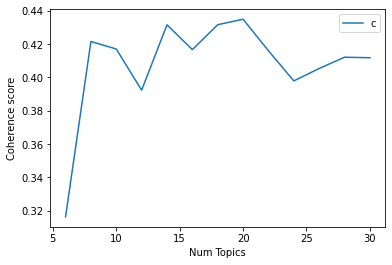

In [70]:
model_list, coherence_values = compute_coherence_values_topics(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=6, limit=32, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=32; start=6; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [116]:
# specific value
m = gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=26, 
                                        chunksize=100,
                                        workers=15,
                                        passes=5,
                                        alpha=0.01,
                                        eta=0.91,
                                        per_word_topics=True)
    
coherence_m = CoherenceModel(model=m, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_m.get_coherence()

0.4087796051138394

In [ ]:
#--8.1 judge the optimal number of topics by HDV

In [35]:
from gensim.models import HdpModel
hdp = HdpModel(corpus, id2word, chunksize=10000)
len(hdp.print_topics())

20

In [ ]:
# 9. final model after tuning

In [ ]:

#lda_model =m

from pprint import pprint

# 
pprint(lda_model.print_topics(num_topics=-1))
doc_lda = lda_model[corpus]

In [ ]:
#final model after tuning all the data (candicate 1 ,canditate 2)

#old version: useless now
#ca1:num:20, 0.11, 0.31
#ca2:num:34 0.21,0.31


#new version: ***************
#ca1:num:30, default
#ca2:num:30 0.11, 0.31

In [41]:
#lda_model_1=gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=20, 
#                                        chunksize=100,
#                                        workers=20,
#                                        passes=5,
#                                        alpha=0.11,
#                                        eta=0.31,
#                                        per_word_topics=True)
#    
#coherence_m_1 = CoherenceModel(model=lda_model_1, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
#print(coherence_m_1.get_coherence())

lda_model_1=lda_model

In [43]:
from pprint import pprint
pprint(lda_model_1.print_topics(num_topics=-1)) #show all the results
doc_lda_1 = lda_model_1[corpus]

[(0,
  '0.036*"water" + 0.024*"environmental" + 0.024*"soil" + 0.012*"atmospheric" '
  '+ 0.011*"carbon" + 0.009*"assessment" + 0.009*"chemical" + 0.008*"impact" + '
  '0.008*"production" + 0.008*"chemistry"'),
 (1,
  '0.035*"brain" + 0.018*"neuroscience" + 0.014*"memory" + 0.013*"cognitive" + '
  '0.010*"functional" + 0.010*"activity" + 0.010*"alzheimer_disease" + '
  '0.010*"behavior" + 0.010*"visual" + 0.009*"motor"'),
 (2,
  '0.050*"measurement" + 0.035*"new" + 0.010*"force" + '
  '0.010*"sae_technical_paper" + 0.010*"atmosphere" + 0.010*"robot" + '
  '0.009*"air" + 0.008*"combustion" + 0.008*"topology" + 0.008*"cultural"'),
 (3,
  '0.078*"genetic" + 0.058*"gene" + 0.027*"molecular" + 0.018*"mutation" + '
  '0.013*"sequence" + 0.012*"genomic" + 0.011*"genome" + 0.009*"expression" + '
  '0.009*"dna" + 0.009*"polymorphism"'),
 (4,
  '0.016*"obesity" + 0.013*"risk" + 0.011*"nutrition" + 0.011*"diabete" + '
  '0.011*"diabetes" + 0.010*"platelet" + 0.010*"factor" + 0.009*"pregnancy" + '

In [44]:
lda_model_2=gensim.models.LdaMulticore(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=30, 
                                        chunksize=100,
                                        workers=20,
                                        passes=5,
                                        alpha=0.11,
                                        eta=0.31,
                                        per_word_topics=True)
    
coherence_m_2 = CoherenceModel(model=lda_model_2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
print(coherence_m_2.get_coherence())
pprint(lda_model_2.print_topics(num_topics=-1))
doc_lda_2 = lda_model_2[corpus]

0.6660410214921259
[(0,
  '0.014*"space" + 0.012*"earth" + 0.011*"wave" + 0.007*"model" + '
  '0.007*"surface" + 0.006*"field" + 0.006*"datum" + 0.006*"rock" + '
  '0.006*"seismic" + 0.006*"structure"'),
 (1,
  '0.047*"material" + 0.016*"property" + 0.015*"surface" + 0.014*"apply" + '
  '0.011*"structure" + 0.010*"film" + 0.009*"growth" + 0.009*"metal" + '
  '0.009*"thin_film" + 0.009*"magnetic"'),
 (2,
  '0.020*"disease" + 0.012*"cardiovascular" + 0.012*"patient" + '
  '0.011*"clinical" + 0.010*"function" + 0.009*"heart" + 0.008*"medicine" + '
  '0.008*"cardiac" + 0.007*"lung" + 0.007*"american"'),
 (3,
  '0.029*"infection" + 0.018*"disease" + 0.016*"clinical" + 0.013*"immunology" '
  '+ 0.011*"virus" + 0.010*"patient" + 0.008*"vaccine" + 0.008*"microbiology" '
  '+ 0.008*"transplantation" + 0.007*"blood"'),
 (4,
  '0.013*"ecology" + 0.011*"population" + 0.011*"evolution" + 0.010*"forest" + '
  '0.009*"diversity" + 0.008*"specie" + 0.008*"genetic" + 0.008*"biology" + '
  '0.008*"anima

In [49]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_2, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.6660410214921259


In [ ]:
# save final model

In [50]:
# Save model to disk.
import os

#model_1_path = os.path.join('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/model_default_para'+str(30))
#lda_model_1.save(model_1_path)

model_2_path = os.path.join('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/model_0.11_0.31_'+str(30))
lda_model_2.save(model_2_path)

# Load a potentially pretrained model from disk.
#lda = LdaModel.load(temp_file)

#save dic
#dic_path = os.path.join('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/dic')
#id2word.save( dic_path )

#save corpus

#temp_file = "N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/Corpus"
#corpora.MmCorpus.serialize(temp_file, corpus)

In [12]:
# load final model

import gensim
lda_model = gensim.models.ldamodel.LdaModel.load('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/model_0.11_0.31_30')
import gensim.corpora as corpora
id2word = corpora.Dictionary.load('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/model_0.11_0.31_30.id2word')

import gensim.corpora as corpora
temp_file = "N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/Corpus"
corpus = corpora.MmCorpus(temp_file)

from pprint import pprint

pprint(lda_model.print_topics(num_topics=-1))

[(0,
  '0.014*"space" + 0.012*"earth" + 0.011*"wave" + 0.007*"model" + '
  '0.007*"surface" + 0.006*"field" + 0.006*"datum" + 0.006*"rock" + '
  '0.006*"seismic" + 0.006*"structure"'),
 (1,
  '0.047*"material" + 0.016*"property" + 0.015*"surface" + 0.014*"apply" + '
  '0.011*"structure" + 0.010*"film" + 0.009*"growth" + 0.009*"metal" + '
  '0.009*"thin_film" + 0.009*"magnetic"'),
 (2,
  '0.020*"disease" + 0.012*"cardiovascular" + 0.012*"patient" + '
  '0.011*"clinical" + 0.010*"function" + 0.009*"heart" + 0.008*"medicine" + '
  '0.008*"cardiac" + 0.007*"lung" + 0.007*"american"'),
 (3,
  '0.029*"infection" + 0.018*"disease" + 0.016*"clinical" + 0.013*"immunology" '
  '+ 0.011*"virus" + 0.010*"patient" + 0.008*"vaccine" + 0.008*"microbiology" '
  '+ 0.008*"transplantation" + 0.007*"blood"'),
 (4,
  '0.013*"ecology" + 0.011*"population" + 0.011*"evolution" + 0.010*"forest" + '
  '0.009*"diversity" + 0.008*"specie" + 0.008*"genetic" + 0.008*"biology" + '
  '0.008*"animal" + 0.007*"conserv

In [ ]:
# 9.1 (optional ) visual the result 

In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis

# Visualize the topics

pyLDAvis.enable_notebook()


LDAvis_data_filepath = os.path.join('N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/ldavis_tuned_'+str(26))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word,workers=10,pyLDAvis,mds='mmds')
LDAvis_prepared

In [ ]:
pyLDAvis.show(LDAvis_prepared)

In [ ]:
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'N:/Bibliometric_Germany/KB data/processed/new_2021_Feb/LDA_result/ldavis_tuned_'+ str(26) +'.html')

LDAvis_prepared

In [ ]:
# 10 analysis and visualzie LDA results

In [ ]:
lda_model=lda_model_2

In [52]:
# 10.1 show topics for each sentence


def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=papers):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_3 in enumerate(ldamodel[corpus]):
        row=row_3[0] if ldamodel.per_word_topics else row_3
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    #contents = texts
    sent_topics_df = pd.concat([texts,sent_topics_df], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=papers)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
#df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.drop(columns={'Unnamed: 0','index'},inplace=True)
# Show
df_dominant_topic.head(10)

KeyError: "['Unnamed: 0'] not found in axis"

In [54]:
df_dominant_topic.drop(columns={'level_0','index'},inplace=True)
df_dominant_topic.head(10)

,AUTHOR_ID_NEW,Text,Text_processed,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,6503845403.000000,About the differentiation of the podotrochlear syndrome with the aid of diagnostic anaesthesia a...,about the differentiation of the podotrochlear syndrome with the aid of diagnostic anaesthesia a...,8.000000,0.565400,"genetic, gene, molecular, mutation, evolution, sequence, genome, genomic, polymorphism, association"
1,6503845461.000000,Timber structure of a storage hall for cut timbers. Rules and non-rules - The story of a retrogr...,timber structure of a storage hall for cut timbers rules and nonrules the story of a retrogress...,1.000000,0.719700,"engineering, laser, power, design, simulation, technology, energy, application, measurement, model"
2,6503845493.000000,Fusion rules for the continuum sectors of the Virasoro algebra with c = 1 Letters in Mathematica...,fusion rules for the continuum sectors of the virasoro algebra with c = 1 letters in mathematica...,17.000000,0.326600,"model, image, theory, datum, detection, application, algorithm, function, estimation, mathematical"
3,6503845540.000000,Cutaneous infiltrates of myelogenous leukemia in association with pre-existing skin diseases (mu...,cutaneous infiltrates of myelogenous leukemia in association with preexisting skin diseases (mul...,0.000000,0.547100,"cancer, breast_cancer, risk, health, exposure, food, assessment, nutrition, environmental, test"
4,6503845628.000000,New equation for the evaluation of standard addition experiments applied to ion chromatography M...,new equation for the evaluation of standard addition experiments applied to ion chromatography m...,18.000000,0.756700,"material, surface, polymer, technology, composite, engineering, property, process, nanoparticle,..."
5,6503845768.000000,The prosecution of public figures and the separation of powers. Confusion within the executive b...,the prosecution of public figures and the separation of powers confusion within the executive br...,13.000000,0.516400,"renal, kidney, skin, metabolism, disease, american, obesity, dermatology, physiology, rat"
6,6503845939.000000,Influence of phytogenic surfactants (quillaya saponin and soya lecithin) on bio-elimination of p...,influence of phytogenic surfactants (quillaya saponin and soya lecithin) on bioelimination of ph...,18.000000,0.567500,"material, surface, polymer, technology, composite, engineering, property, process, nanoparticle,..."
7,6503846007.000000,Epitaxial growth of AlN and GaN on Si(1 1 1) by plasma-assisted molecular beam epitaxy Journal o...,epitaxial growth of aln and gan on si(1 1 1) by plasmaassisted molecular beam epitaxy journal of...,6.000000,0.474200,"cell, protein, molecular, expression, gene, cancer, biology, receptor, mouse, signal"
8,6503846041.000000,Recommendations for primary alimentary prevention of atopic diseases in children at risk Allergo...,recommendations for primary alimentary prevention of atopic diseases in children at risk allergo...,7.000000,0.947100,"patient, clinical, treatment, child, therapy, health, disease, care, medicine, medical"
9,6503846089.000000,Bautechnik,bautechnik,0.000000,0.050000,"cancer, breast_cancer, risk, health, exposure, food, assessment, nutrition, environmental, test"


In [55]:
df_dominant_topic.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_April/LDA_result/Topic_results.csv', index=False)

In [93]:
# 10.2 Display setting to show more characters in column
pd.options.display.max_colwidth = 1000

sent_topics_sorteddf = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf.reset_index(drop=True, inplace=True)

# Format
#sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf.head(10)

,index,Unnamed: 0,PK_ITEMS,LANGUAGE_CODE,CODE,Text,Text_processed,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,247191,1247078,16913100208,eng,2205;2215,"Limits to plastic analysis design due to size-scale effects on the rotational capacity of plastic hinges 3rd International fib Congress and Exhibition, Incorporating the PCI Annual Convention and Bridge Conference: Think Globally, Build Locally, Proceedings Code prescriptions Moment redistribution Nonlinear analysis Nonlinear fracture mechanics Plastic rotation Size effects",limits to plastic analysis design due to sizescale effects on the rotational capacity of plastic hinges 3rd international fib congress and exhibition incorporating the pci annual convention and bridge conference think globally build locally proceedings code prescriptions moment redistribution nonlinear analysis nonlinear fracture mechanics plastic rotation size effects,0.0,0.9679,"drug, society, filter, test, new, film, morphology, american_chemical, physical_review_letter, optical"
1,2523487,14433609,2742859502,eng,1107;1111;2303,"Biodiverse edible schools: Linking healthy food, school gardens and local urban biodiversity Urban Forestry and Urban Greening Abandoned sites Green space stewardship Provisioning ecosystem services Urban agriculture Urban foraging Vacant land",biodiverse edible schools linking healthy food school gardens and local urban biodiversity urban forestry and urban greening abandoned sites green space stewardship provisioning ecosystem services urban agriculture urban foraging vacant land,1.0,0.9630,"network, communication, information, cluster, model, technology, conference, quality, inflammation, application"
2,5319262,36126739,2386300152,eng,2213;2500,Effects of Environment Knowledge in Evacuation Scenarios Involving Fire and Smoke: A Multiscale Modelling and Simulation Approach Fire Technology Crowd dynamics Environment knowledge Evacuation Fire and smoke dynamics Particle methods Transport processes,effects of environment knowledge in evacuation scenarios involving fire and smoke a multiscale modelling and simulation approach fire technology crowd dynamics environment knowledge evacuation fire and smoke dynamics particle methods transport processes,2.0,0.9582,"plant, specie, assay, variable, physics, basin, charge, parkinson_disease, new, double"
3,9384169,74448357,1266812827,eng,2208,2.1-Channel Switching Amplifier with DC/High-Frequency-AC Mixed Power Supply for Efficiency Improvement and Bus Voltage Pumping Elimination IEEE Transactions on Power Electronics 2.1-channel active clamp bus voltage pumping (BVP) class-D amplifier high-frequency link inverter,21channel switching amplifier with dc/highfrequencyac mixed power supply for efficiency improvement and bus voltage pumping elimination ieee transactions on power electronics 21channel active clamp bus voltage pumping (bvp) classd amplifier highfrequency link inverter,3.0,0.9599,"structure, protein, phase, language, crystal, laser, optical, order, technology, standard"
4,6377547,46409505,920009890,eng,1505;3110,"Natural and artificial ageing of protective coatings for outdoor bronzes protection EUROCORR 2017 - The Annual Congress of the European Federation of Corrosion, 20th International Corrosion Congress and Process Safety Congress 2017 Artificial ageing Coatings Corrosion inhibitors Keywords Natural Long-term efficacy Outdoor bronzes",natural and artificial ageing of protective coatings for outdoor bronzes protection eurocorr 2017 the annual congress of the european federation of corrosion 20th international corrosion congress and process safety congress 2017 artificial ageing coatings corrosion inhibitors keywords natural longterm efficacy outdoor bronzes,4.0,0.9657,"wave, rehabilitation, model, pressure, psychiatry, engineering, elderly, task, component, management"
5,4676446,30492911,10909728349,eng,1102;1111,Simulation of spring barley yield in different climatic zones of Northern and Central Europe: A comparison of

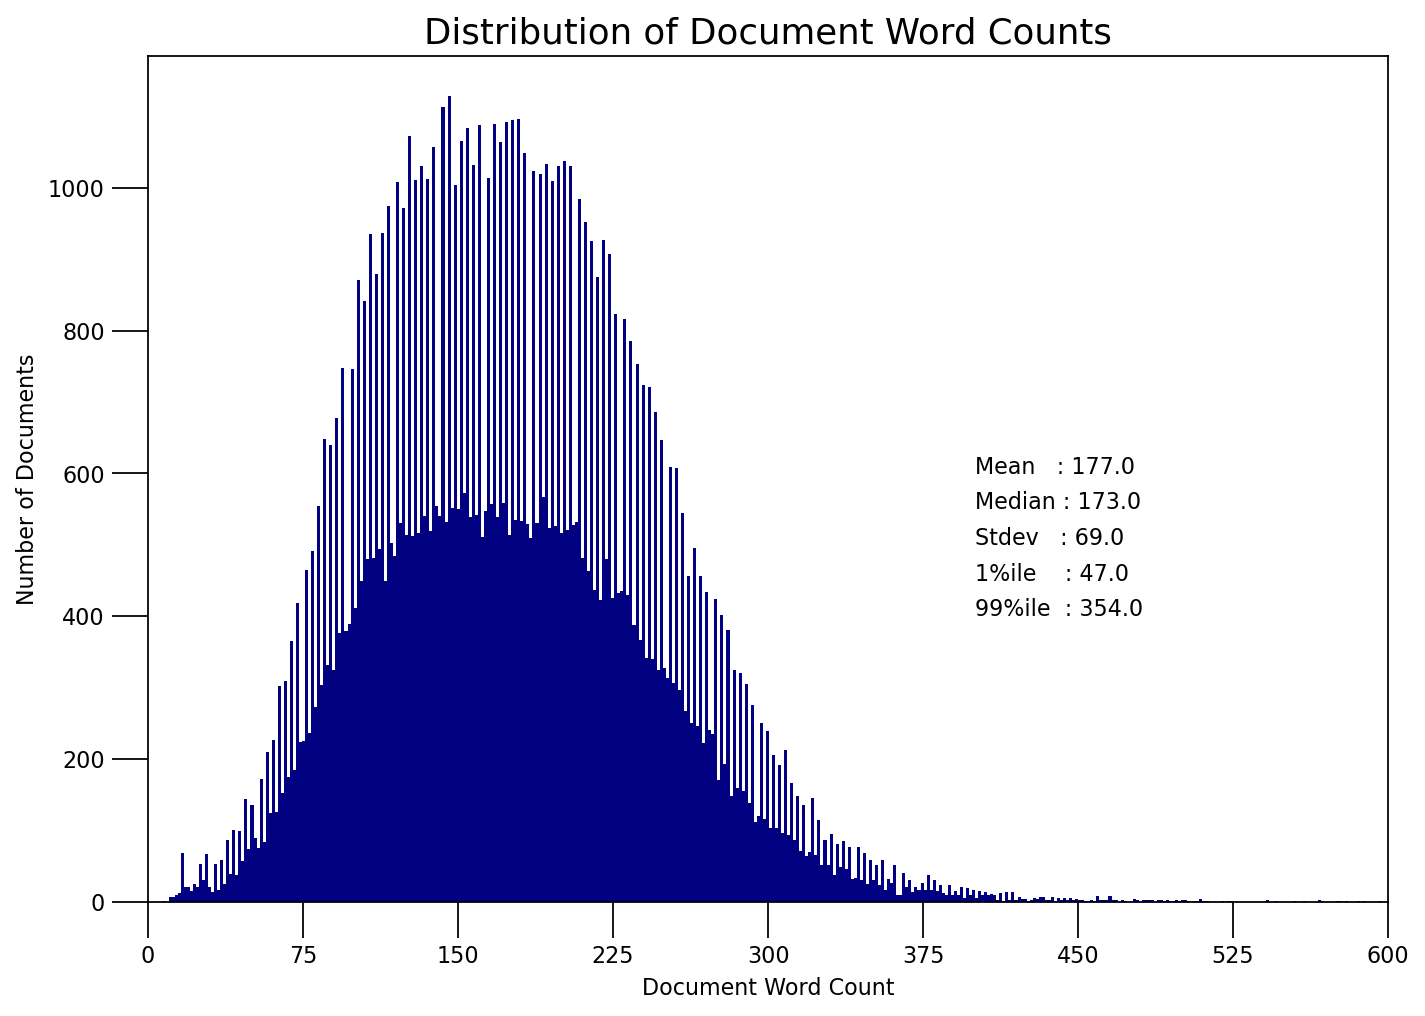

In [101]:
#10.3. Frequency Distribution of Word Counts in Documents
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(10,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(400, 600, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(400, 550, "Median : " + str(round(np.median(doc_lens))))
plt.text(400, 500, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(400, 450, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(400, 400, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 600), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,600,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=16))
plt.show()

260


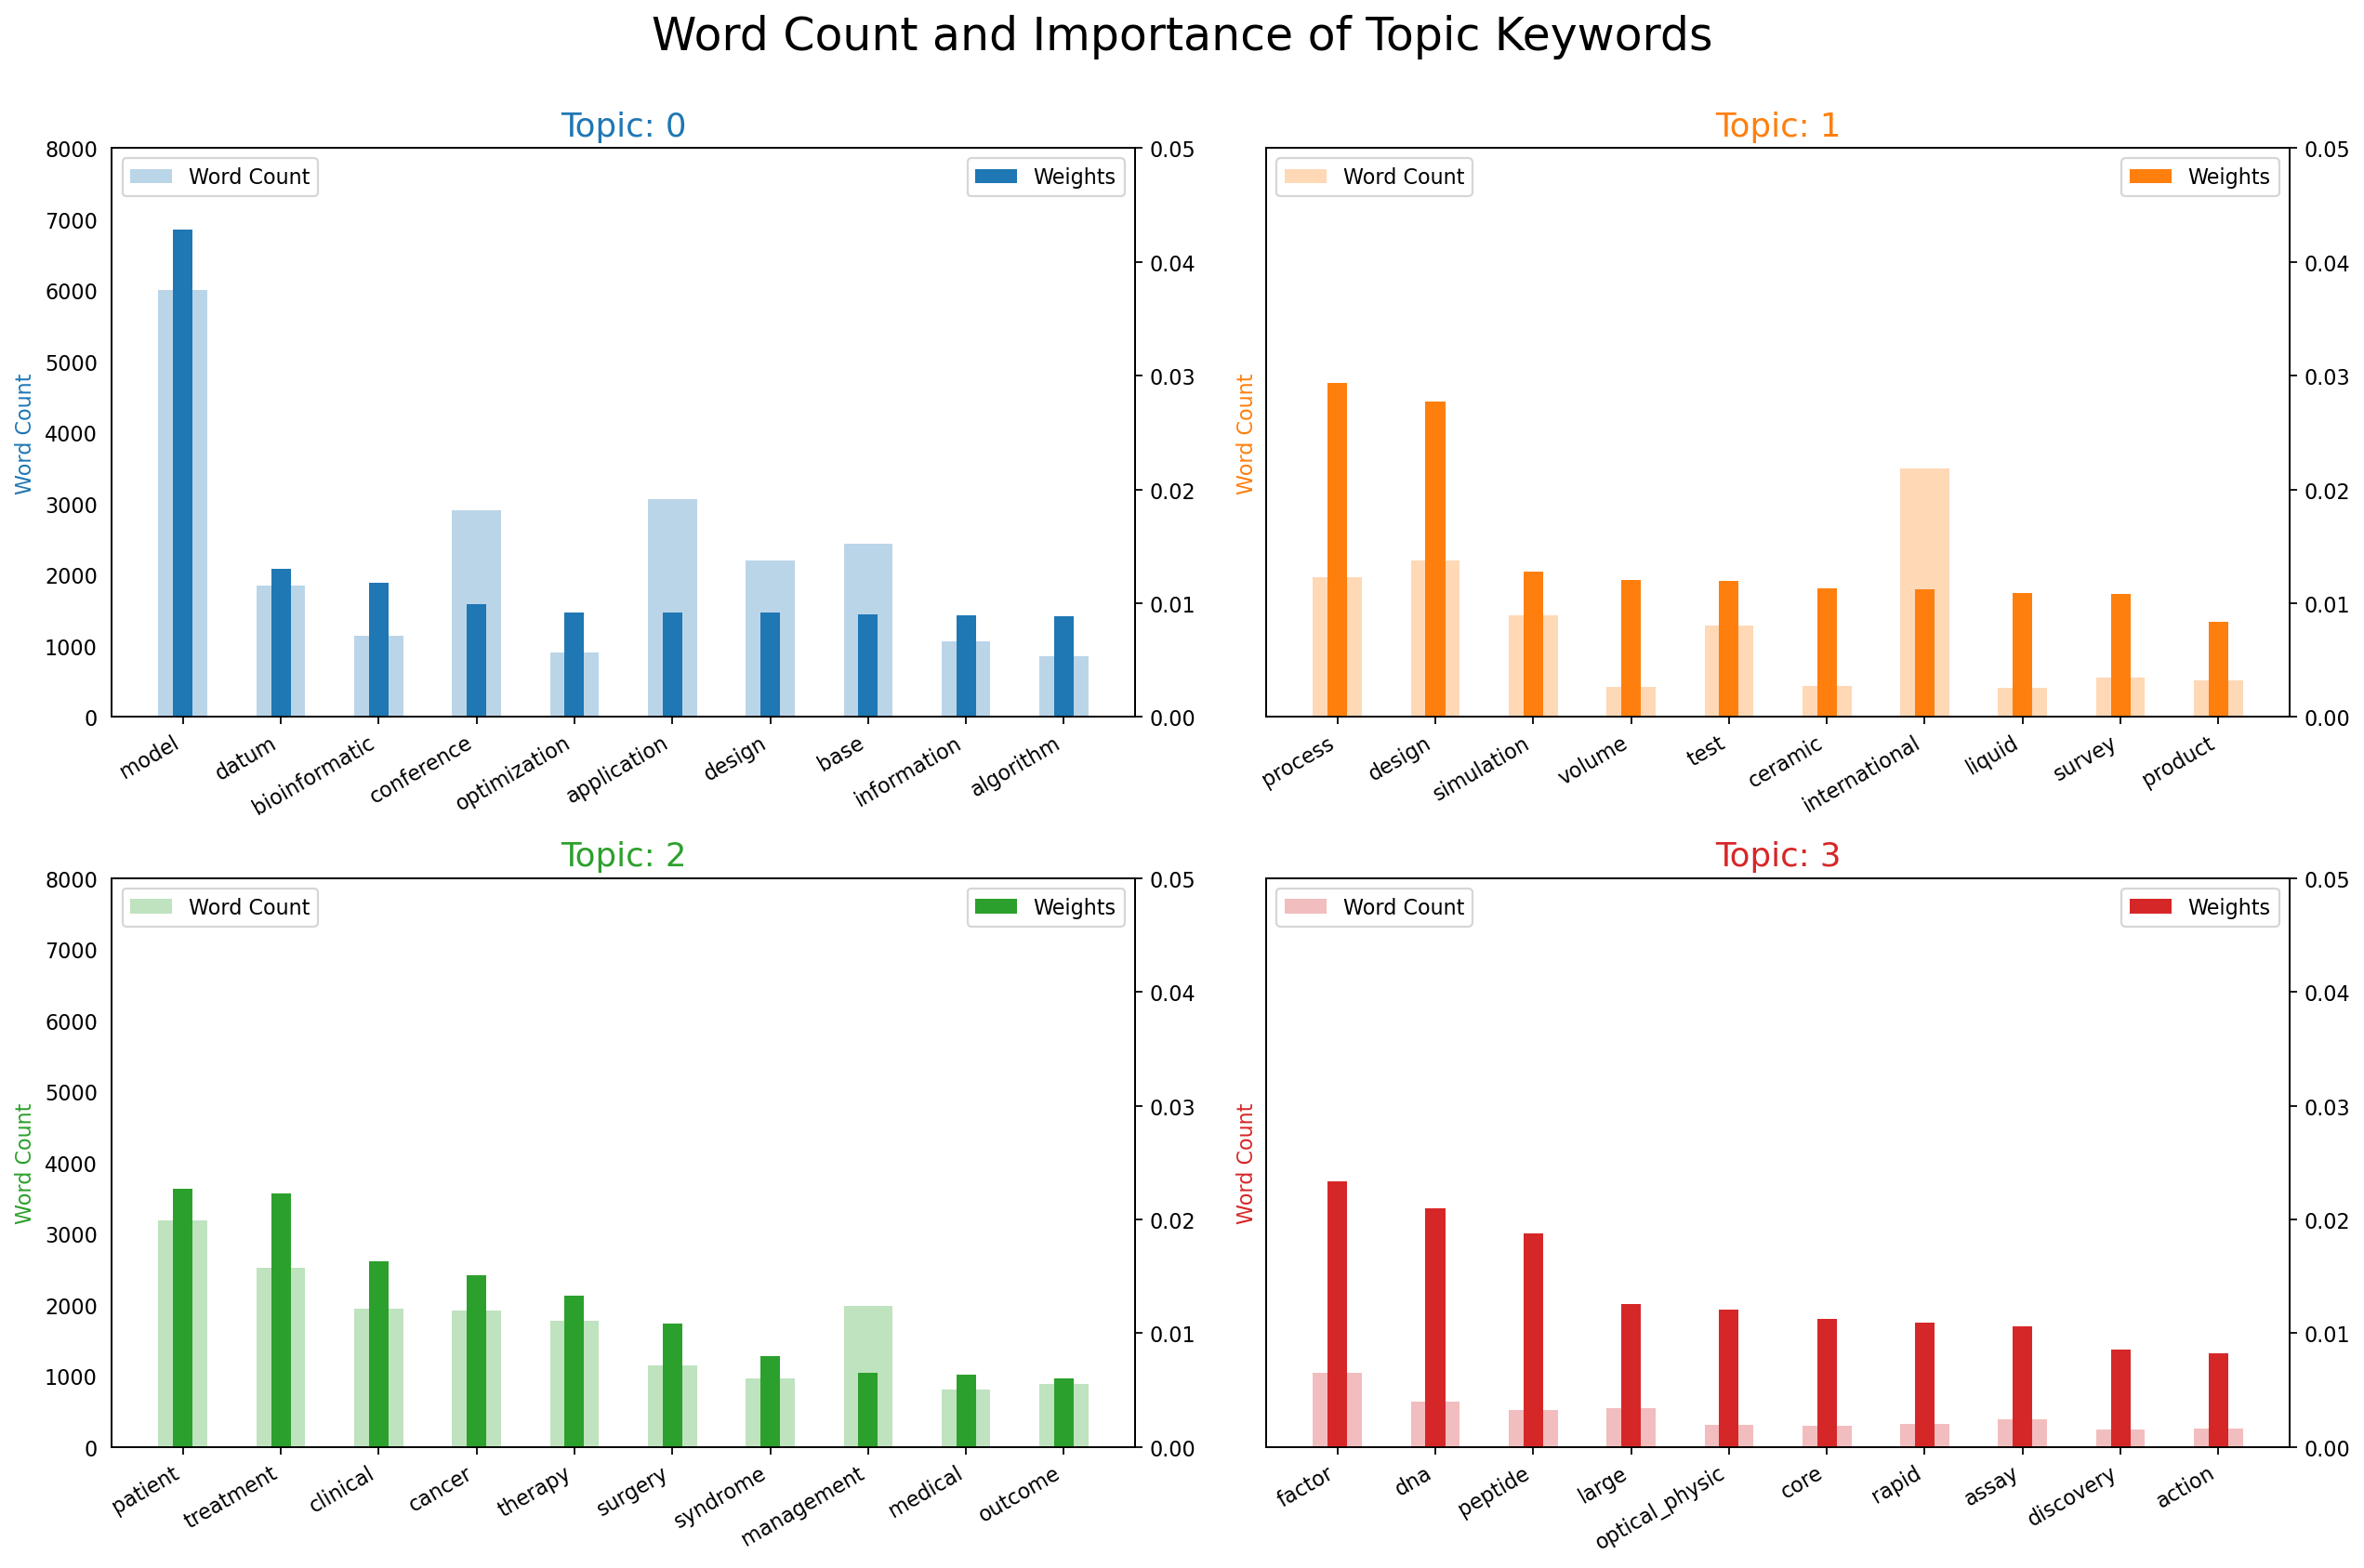

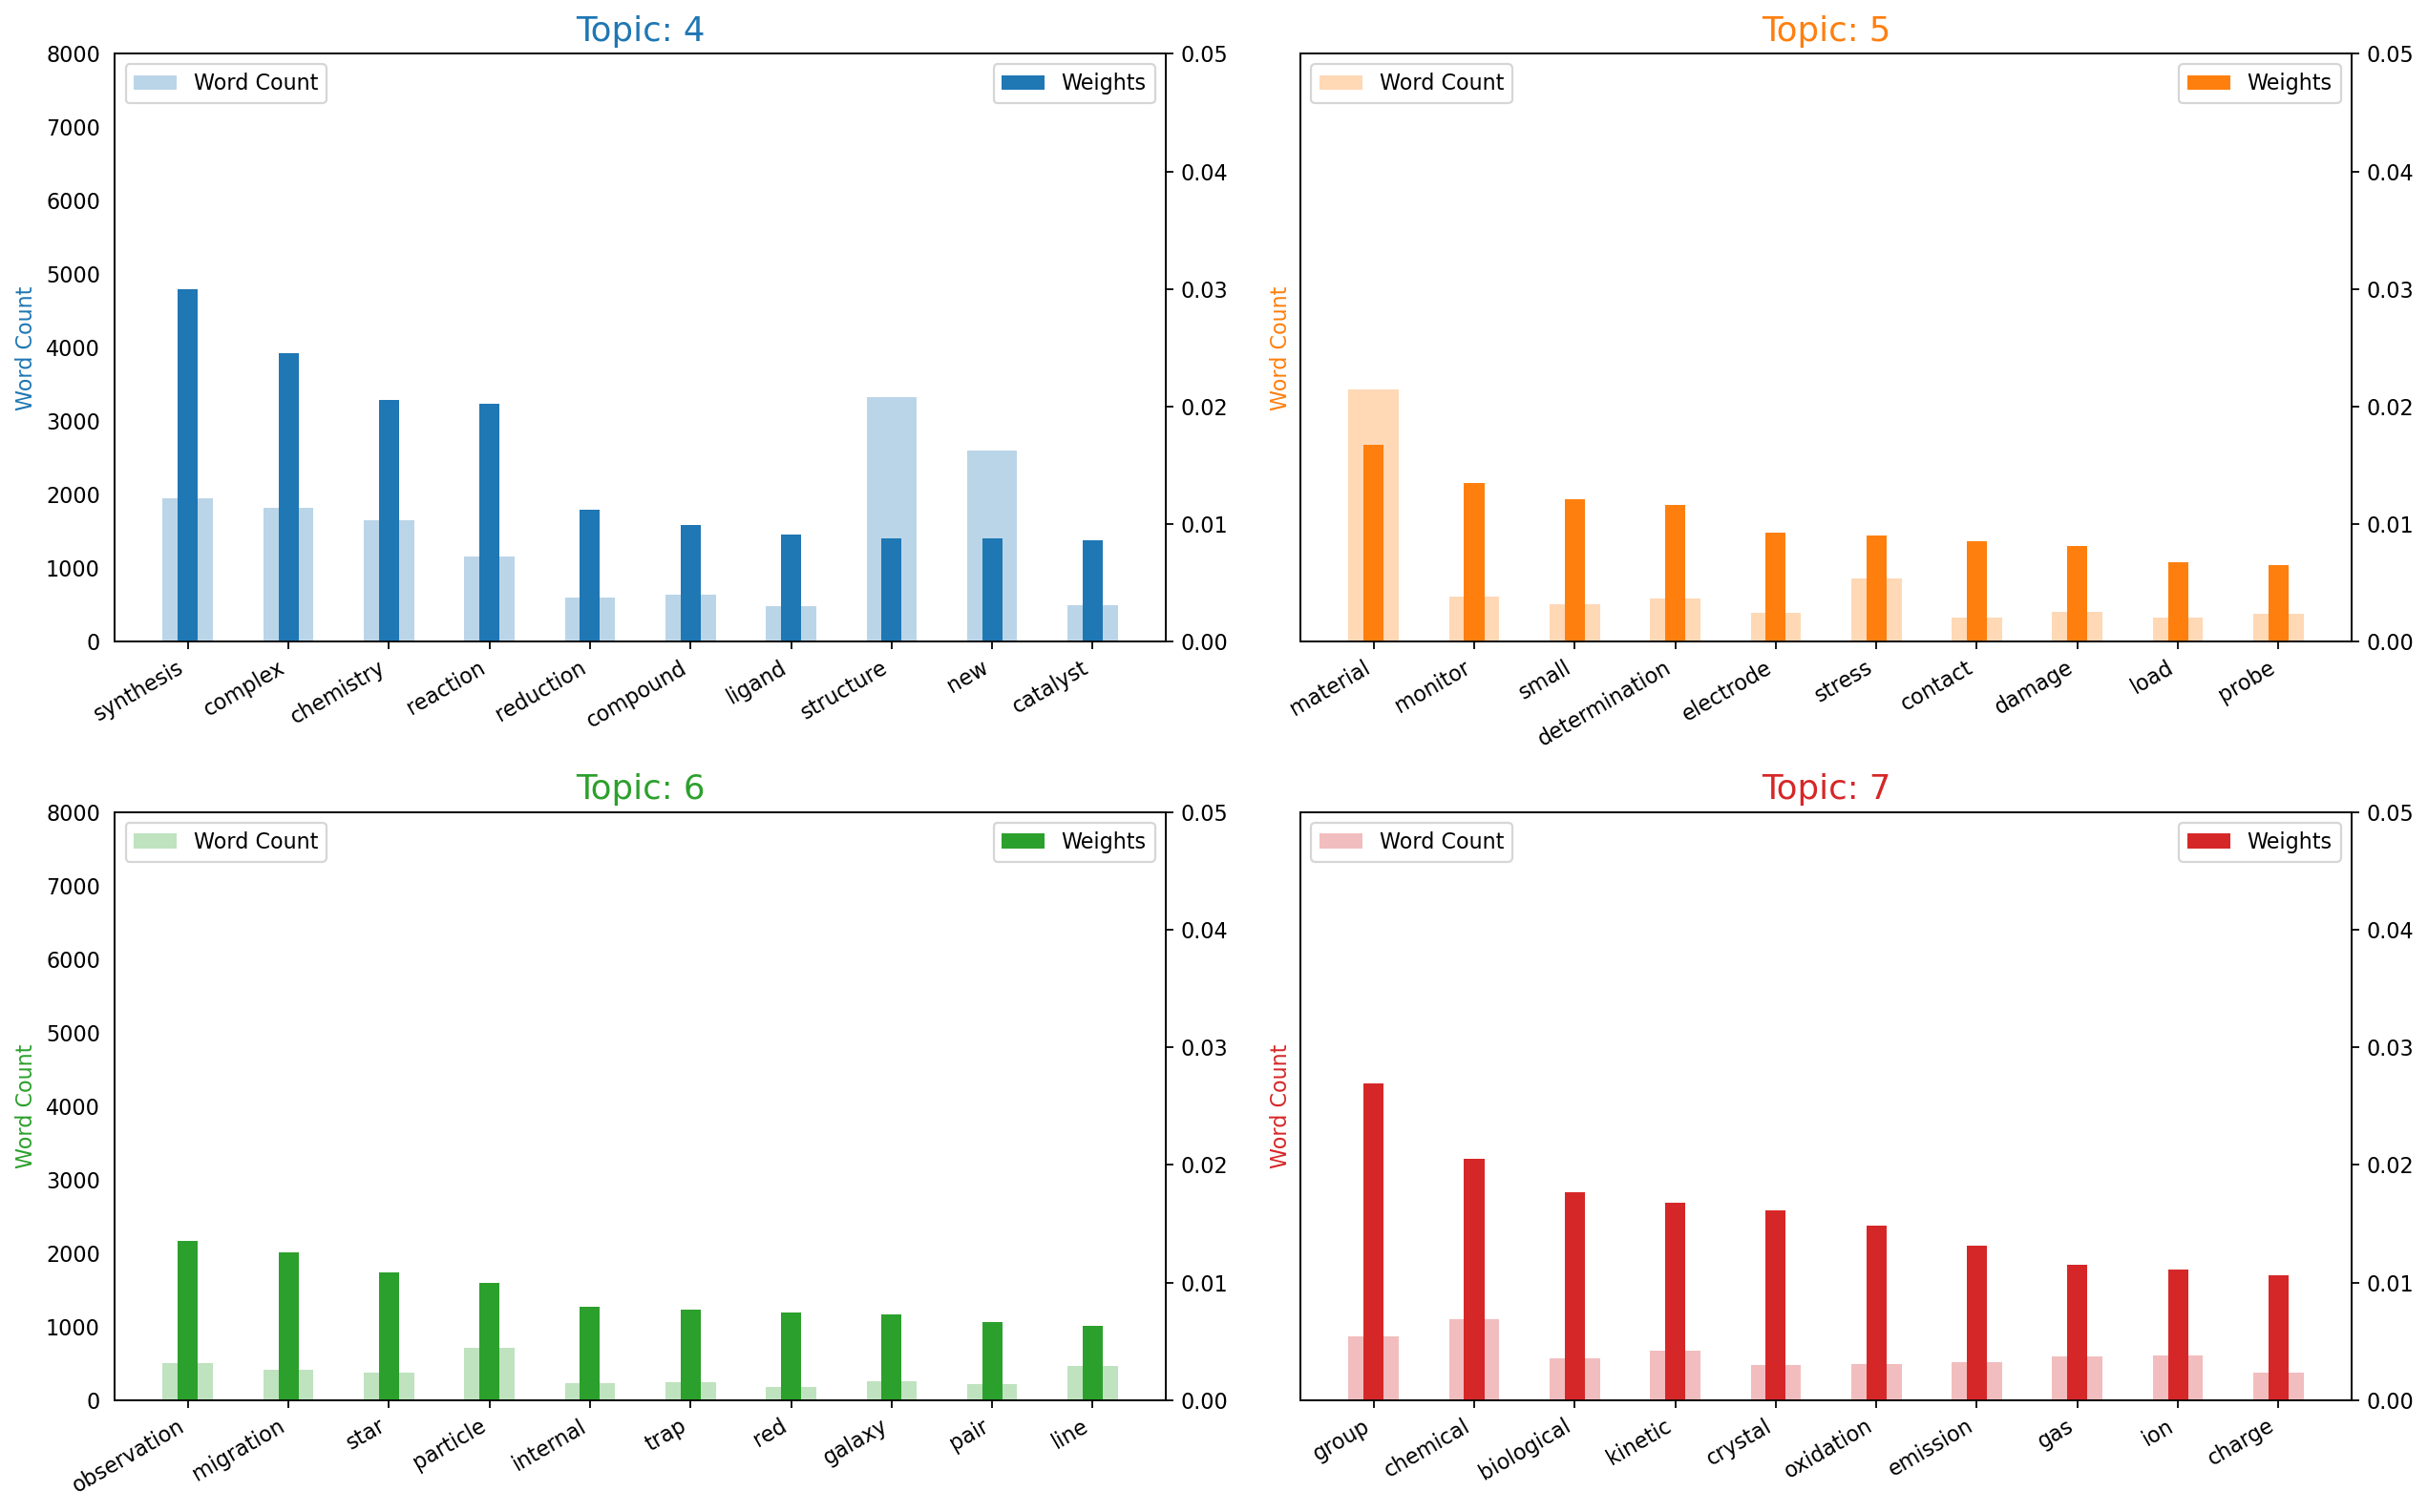

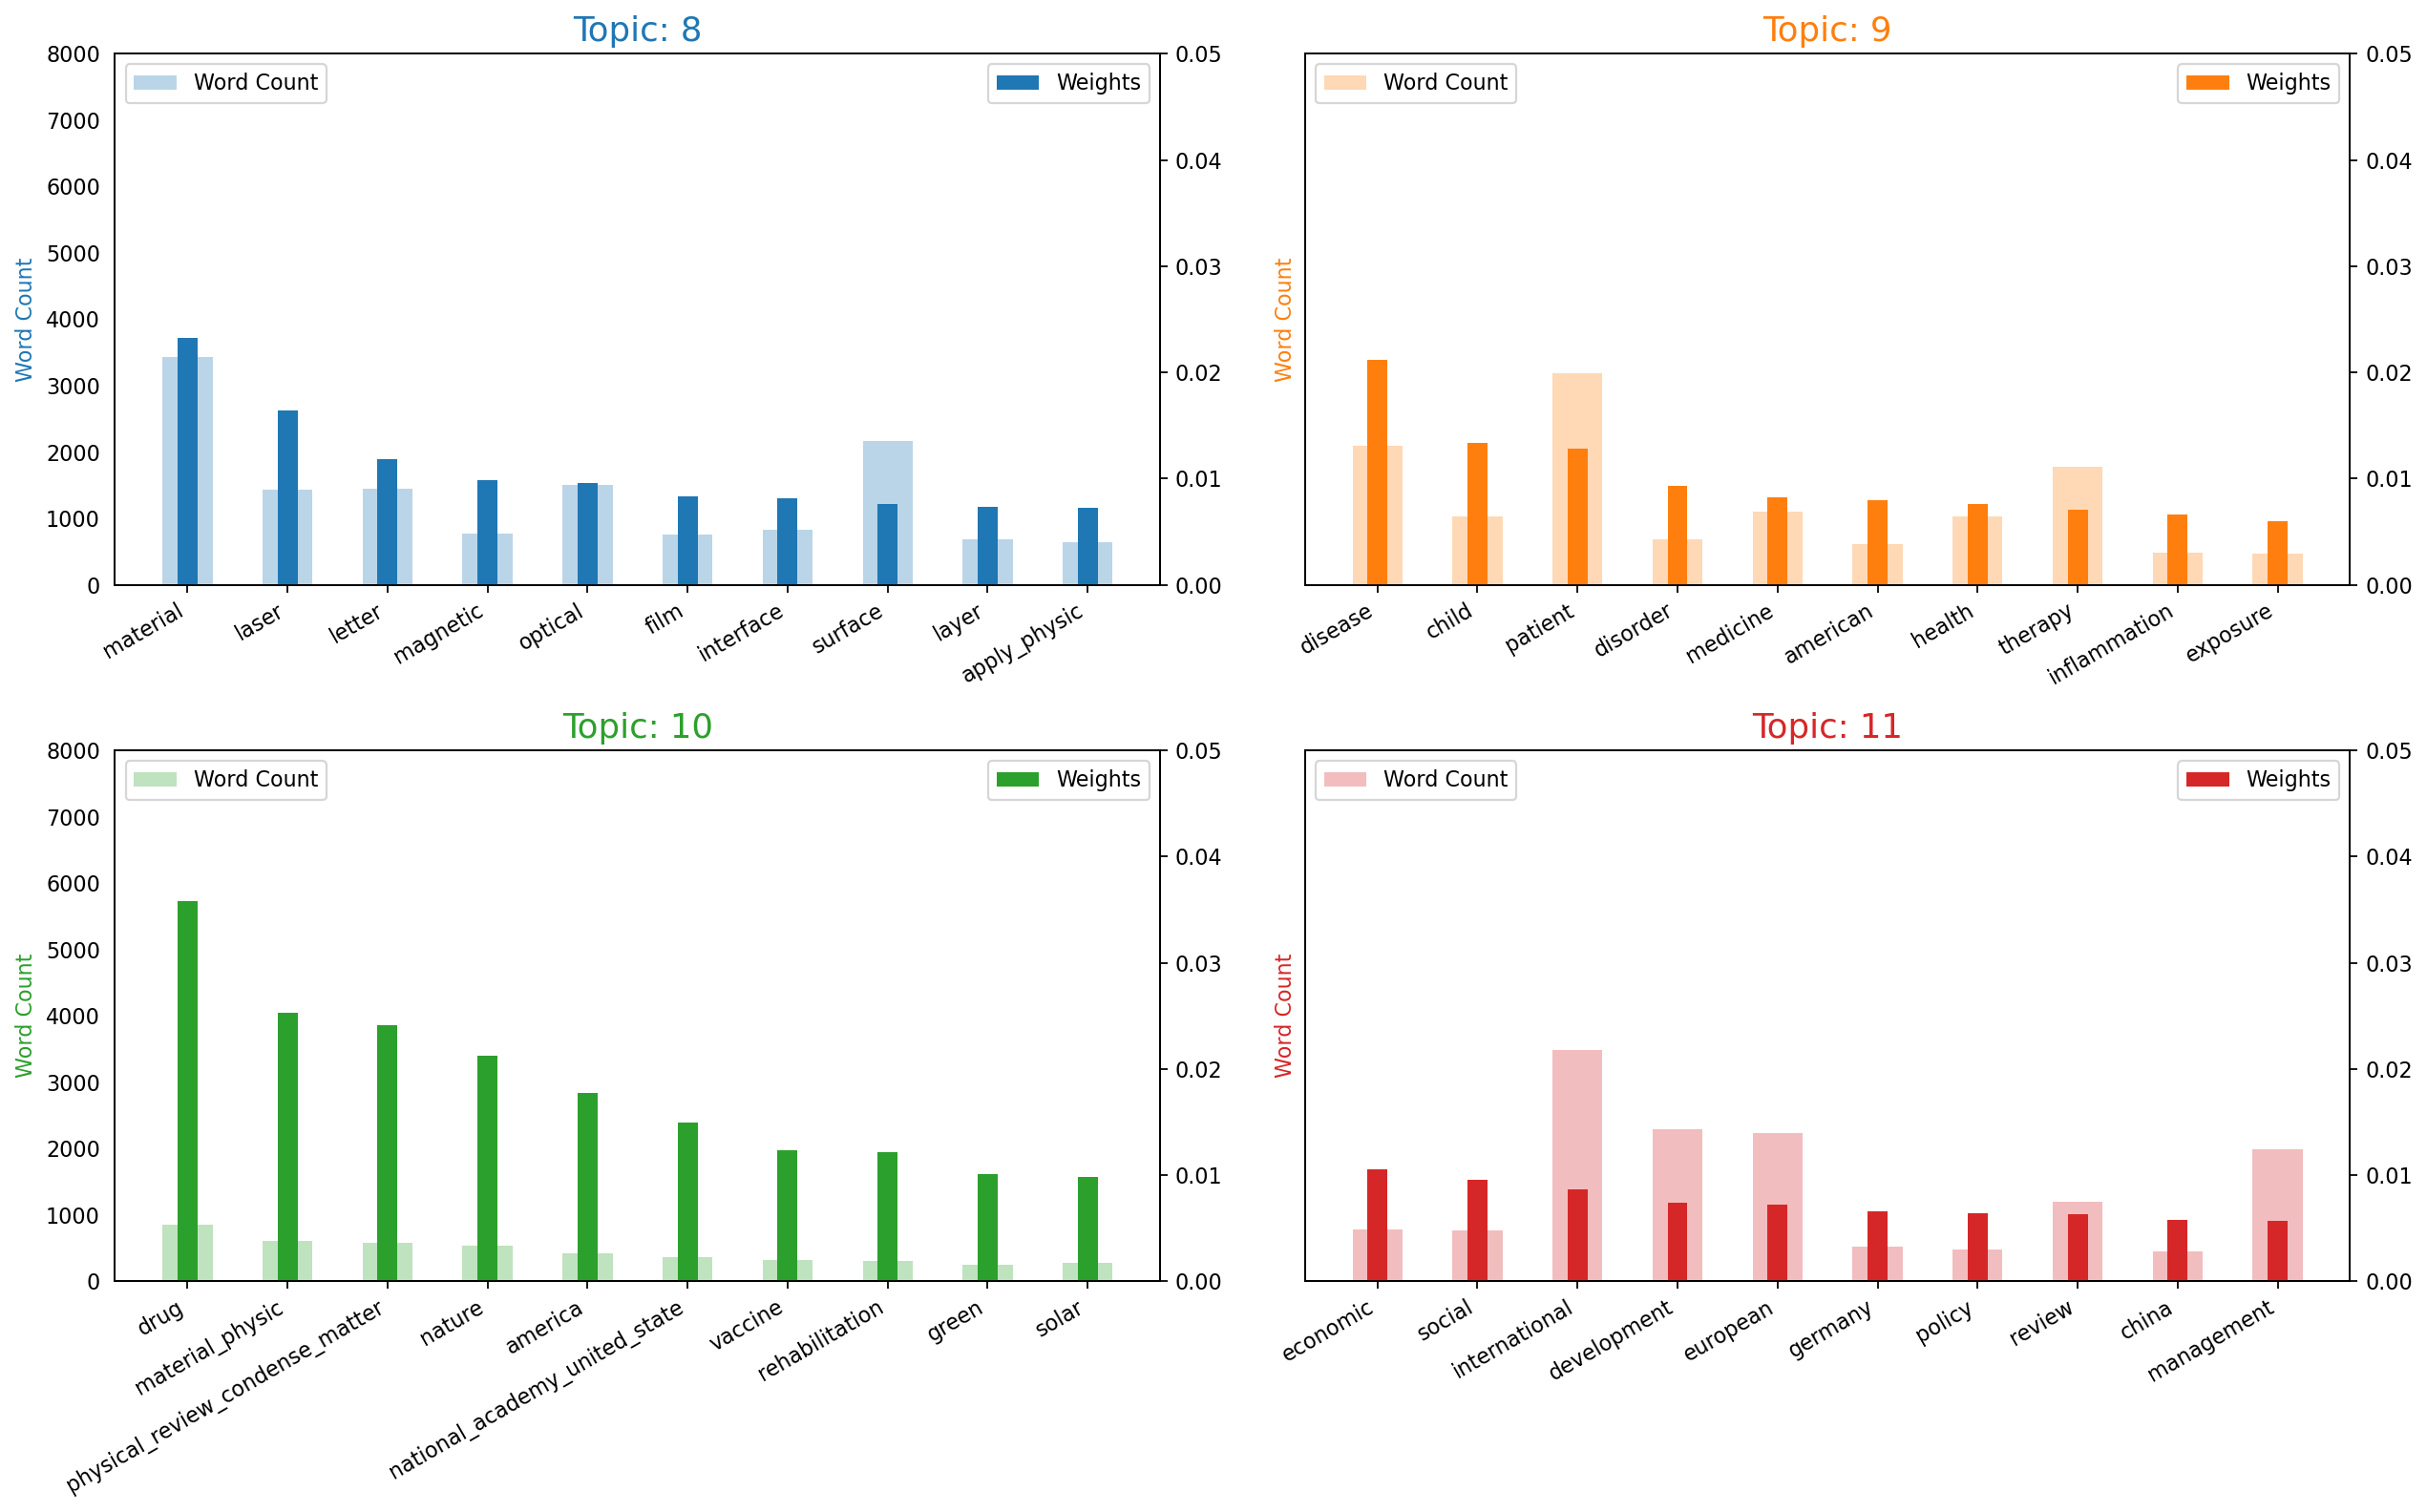

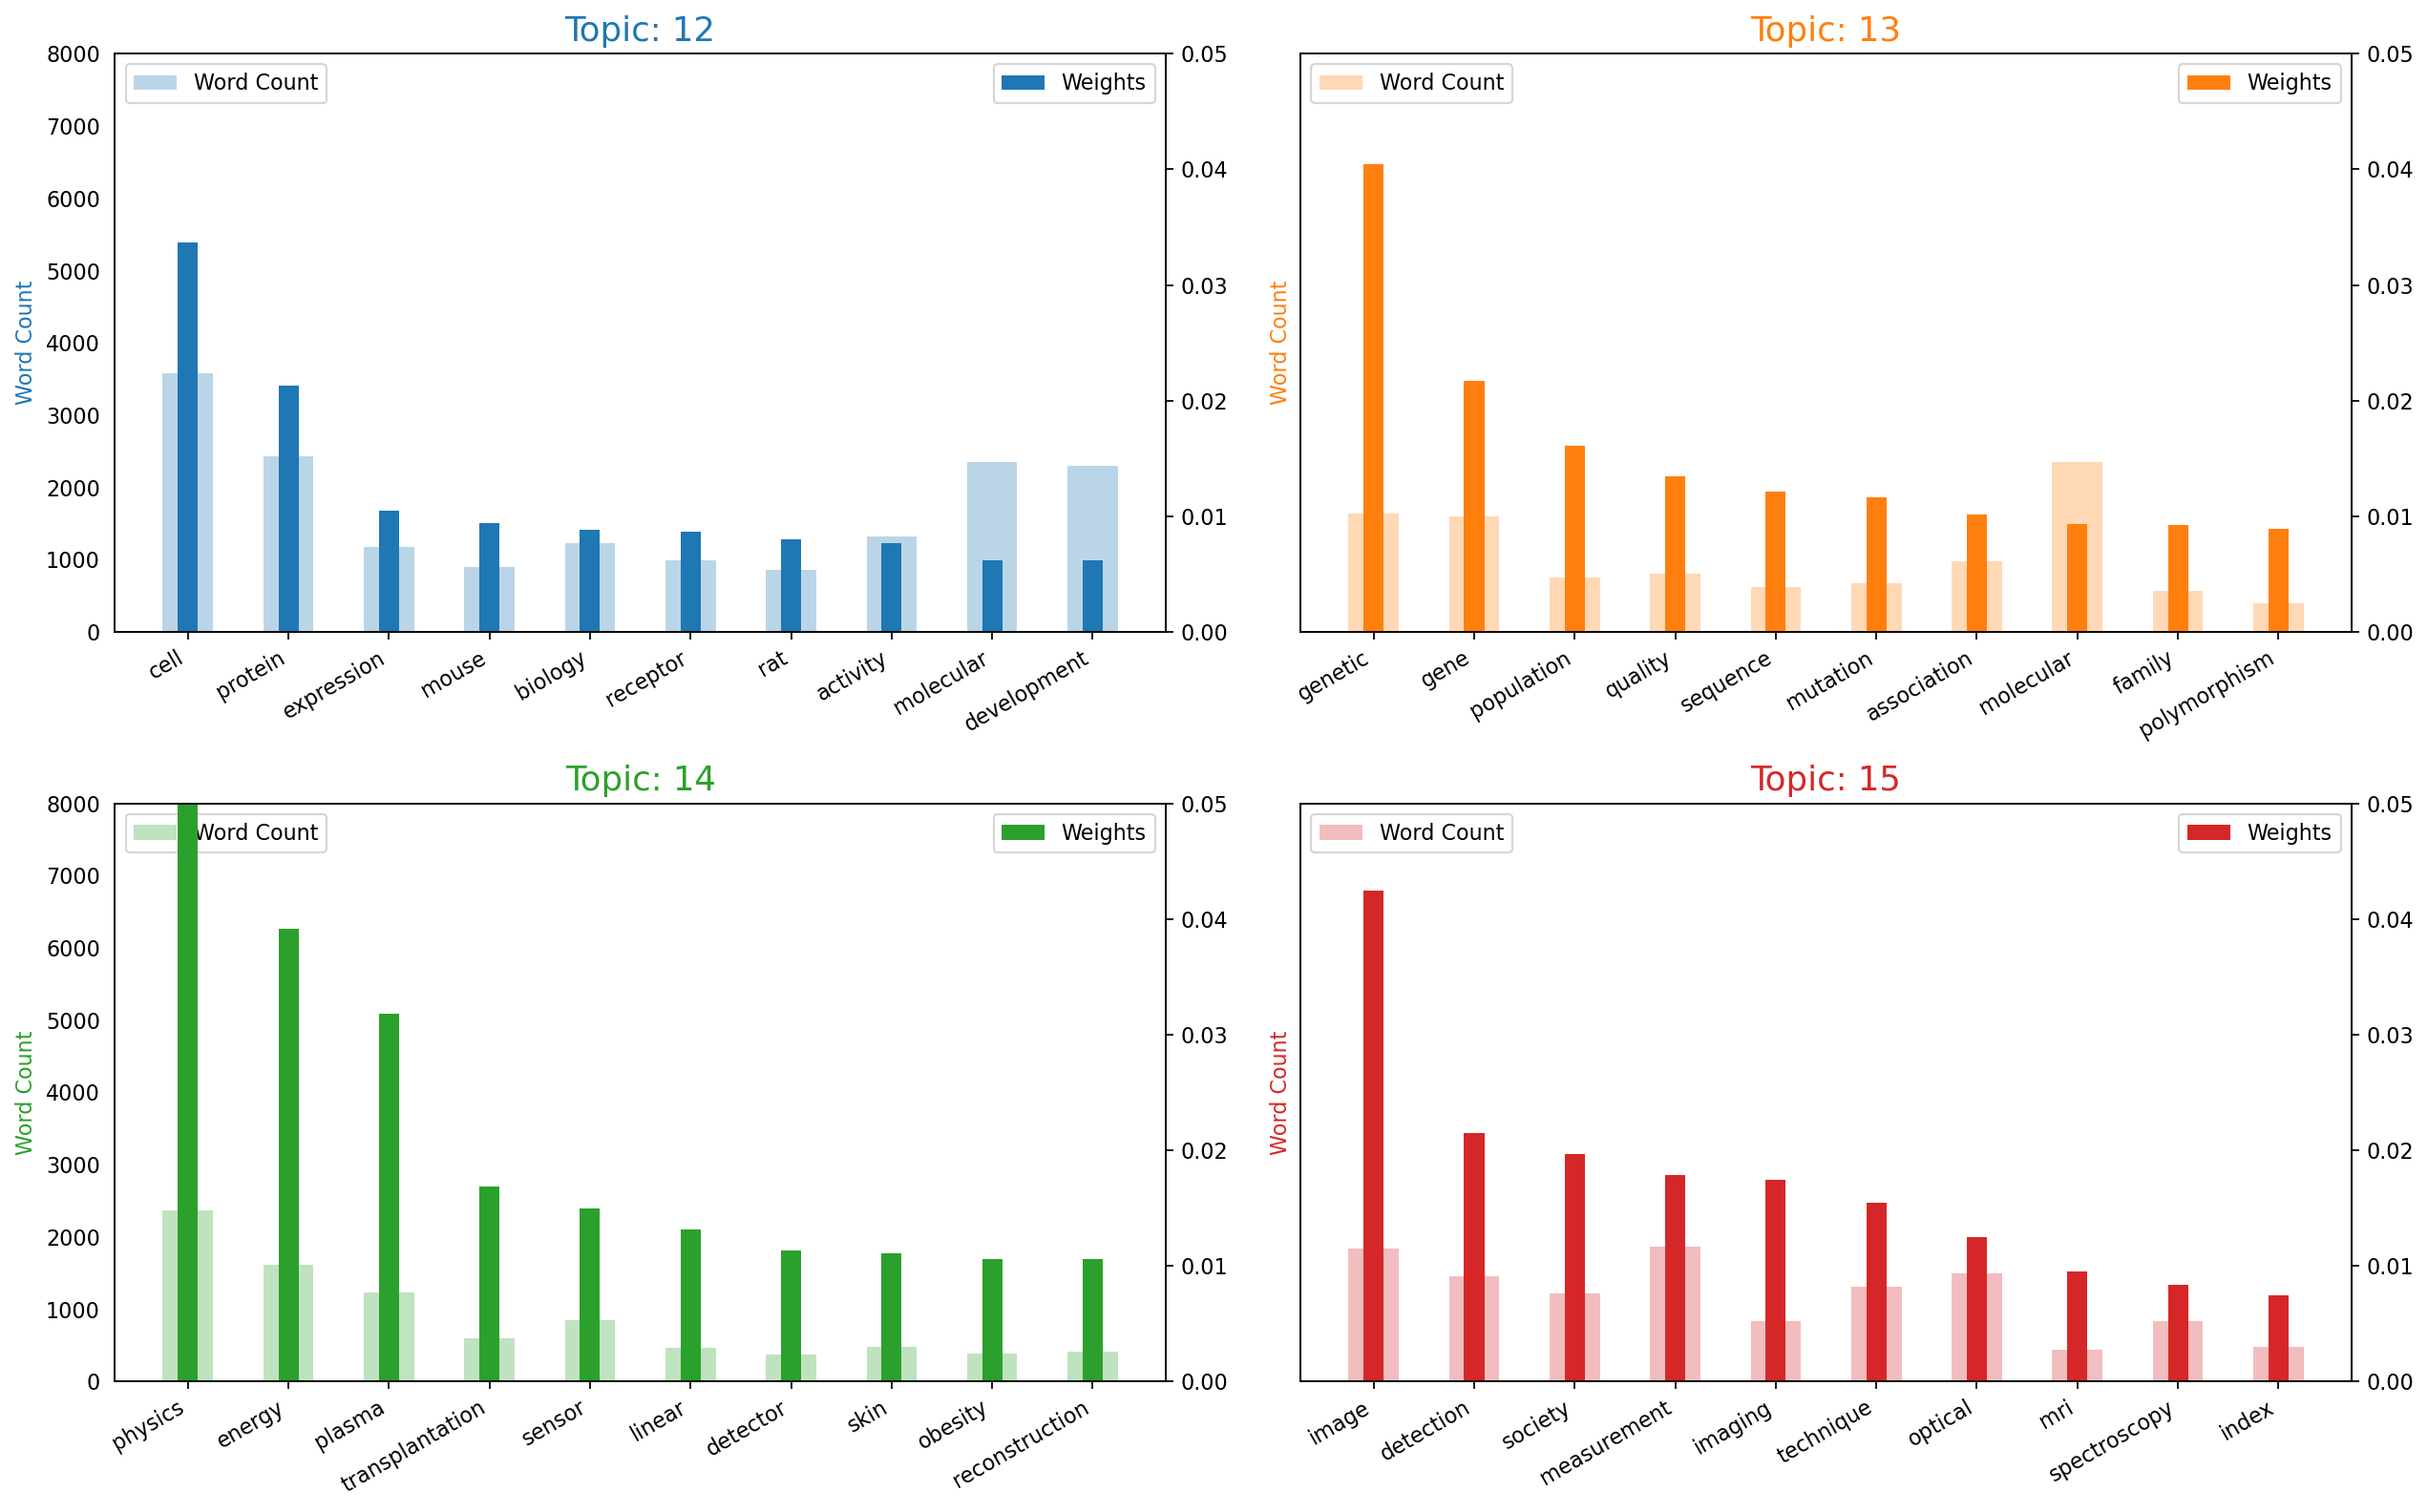

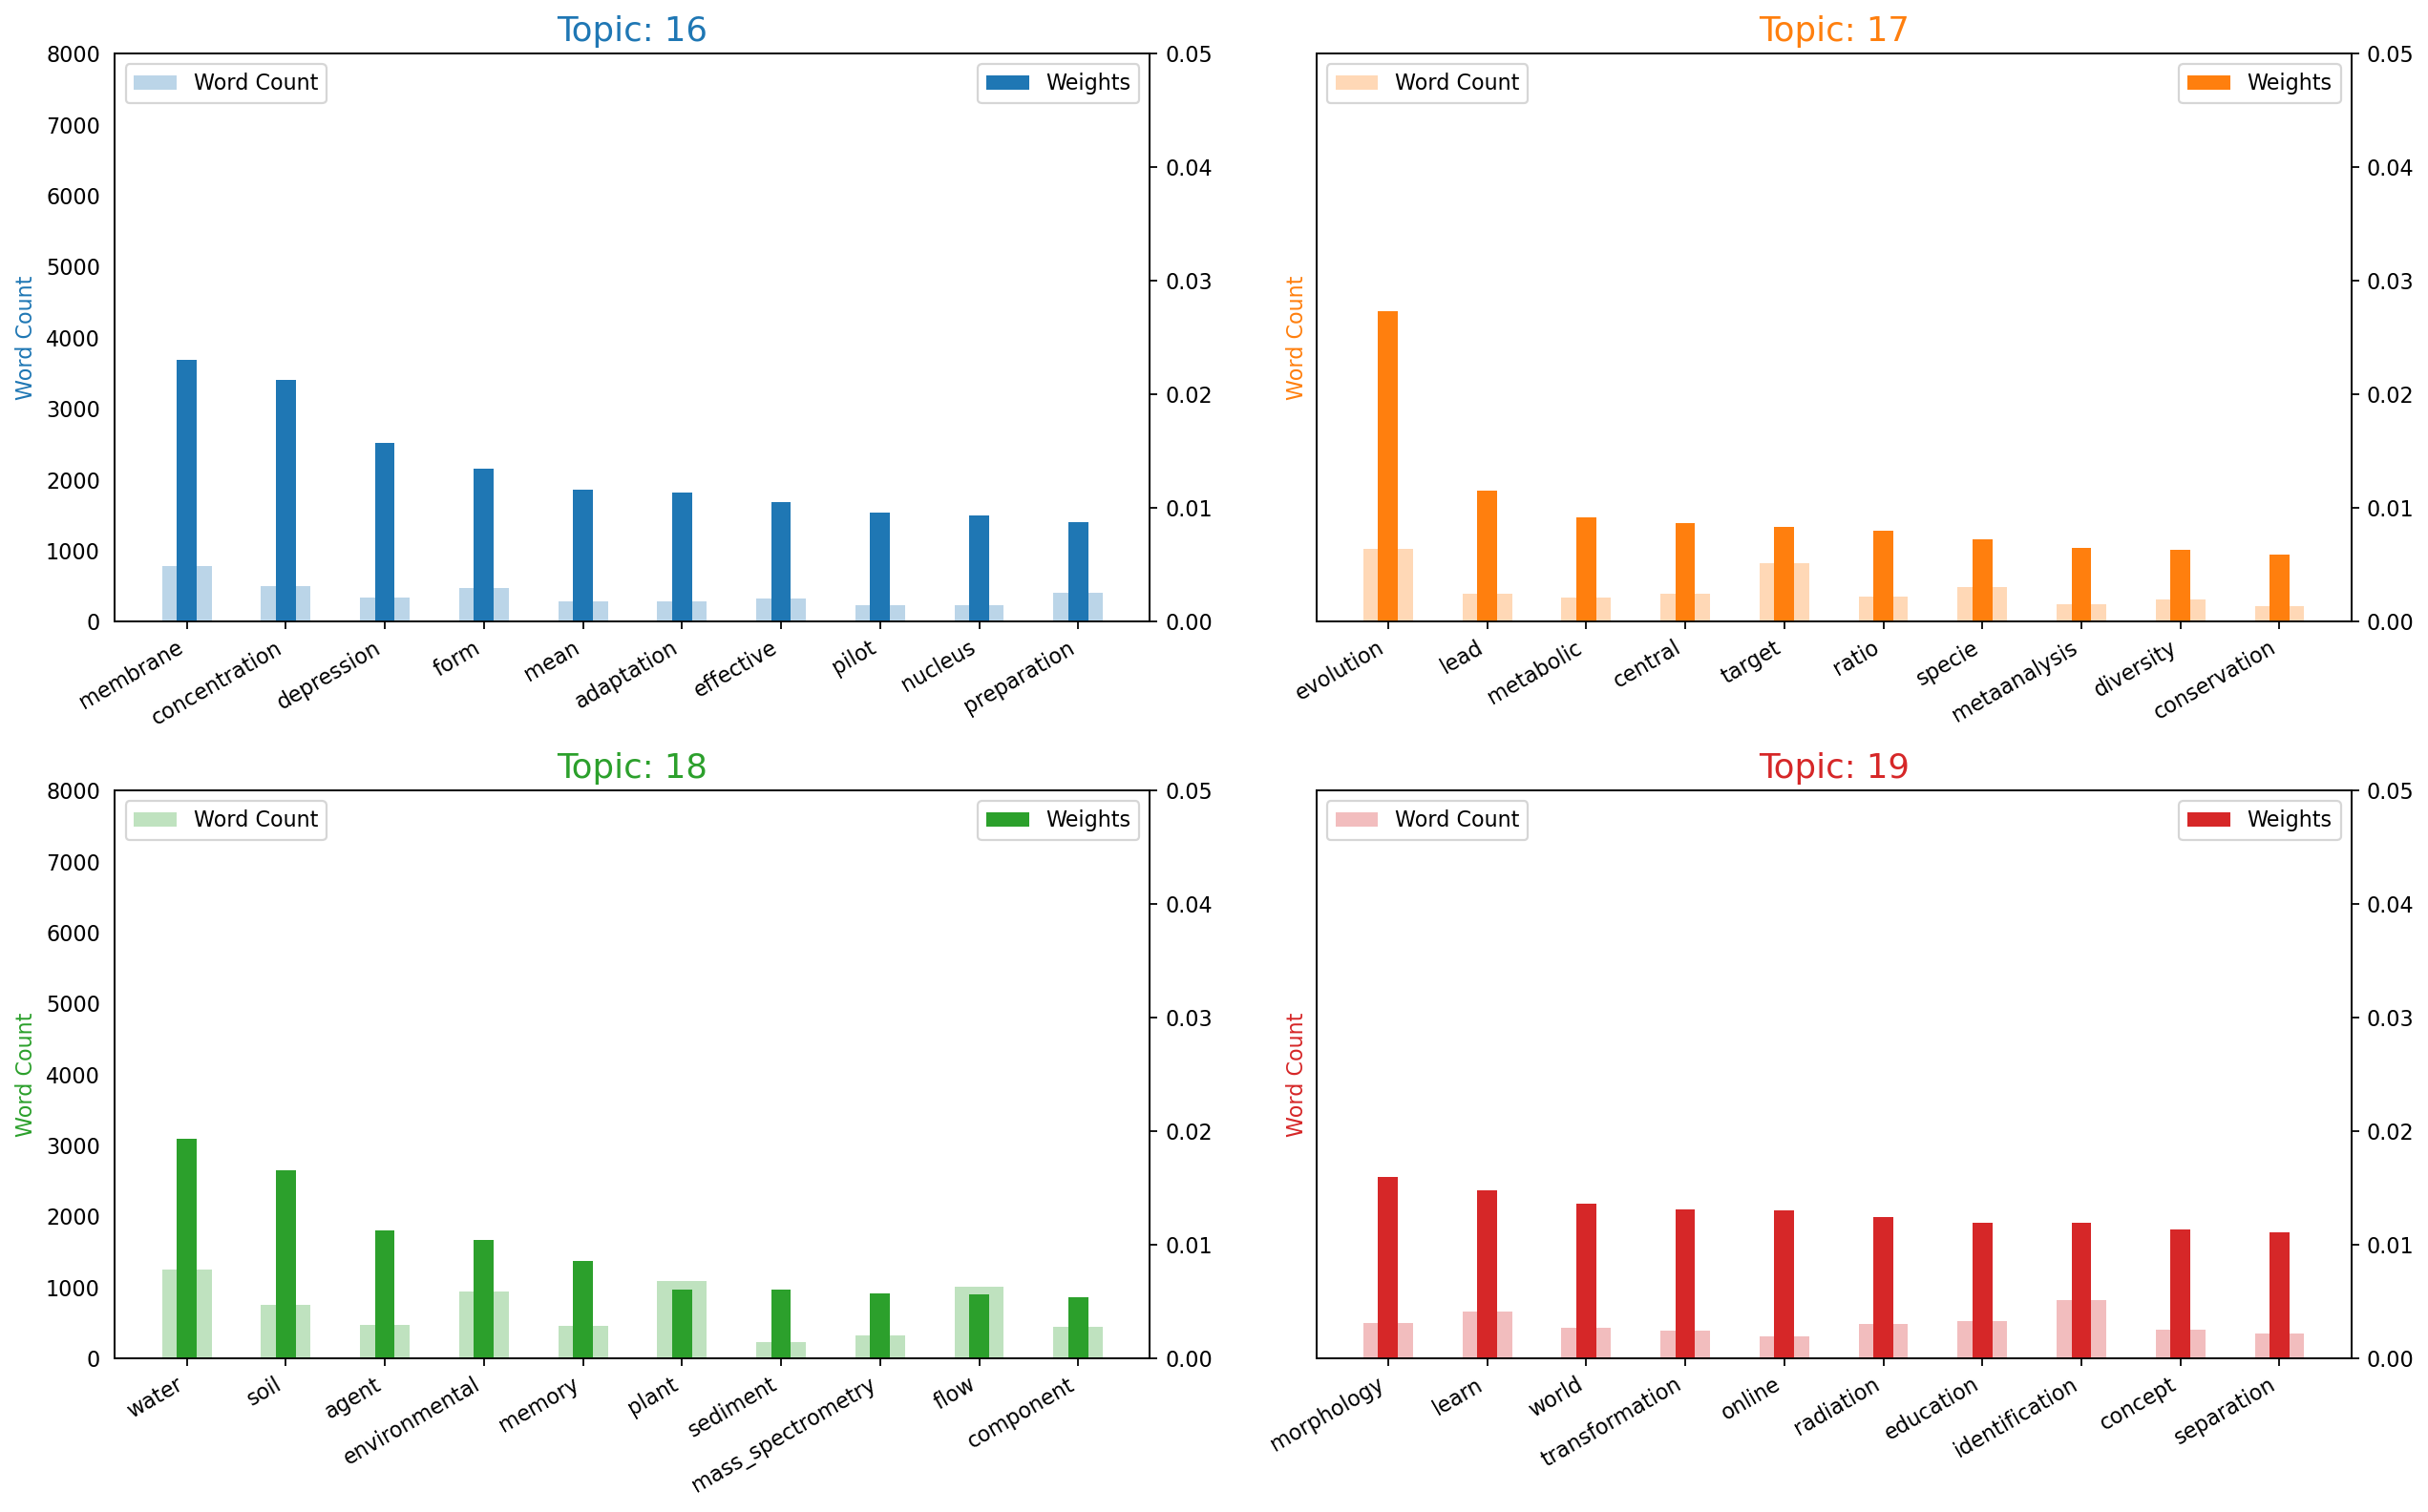

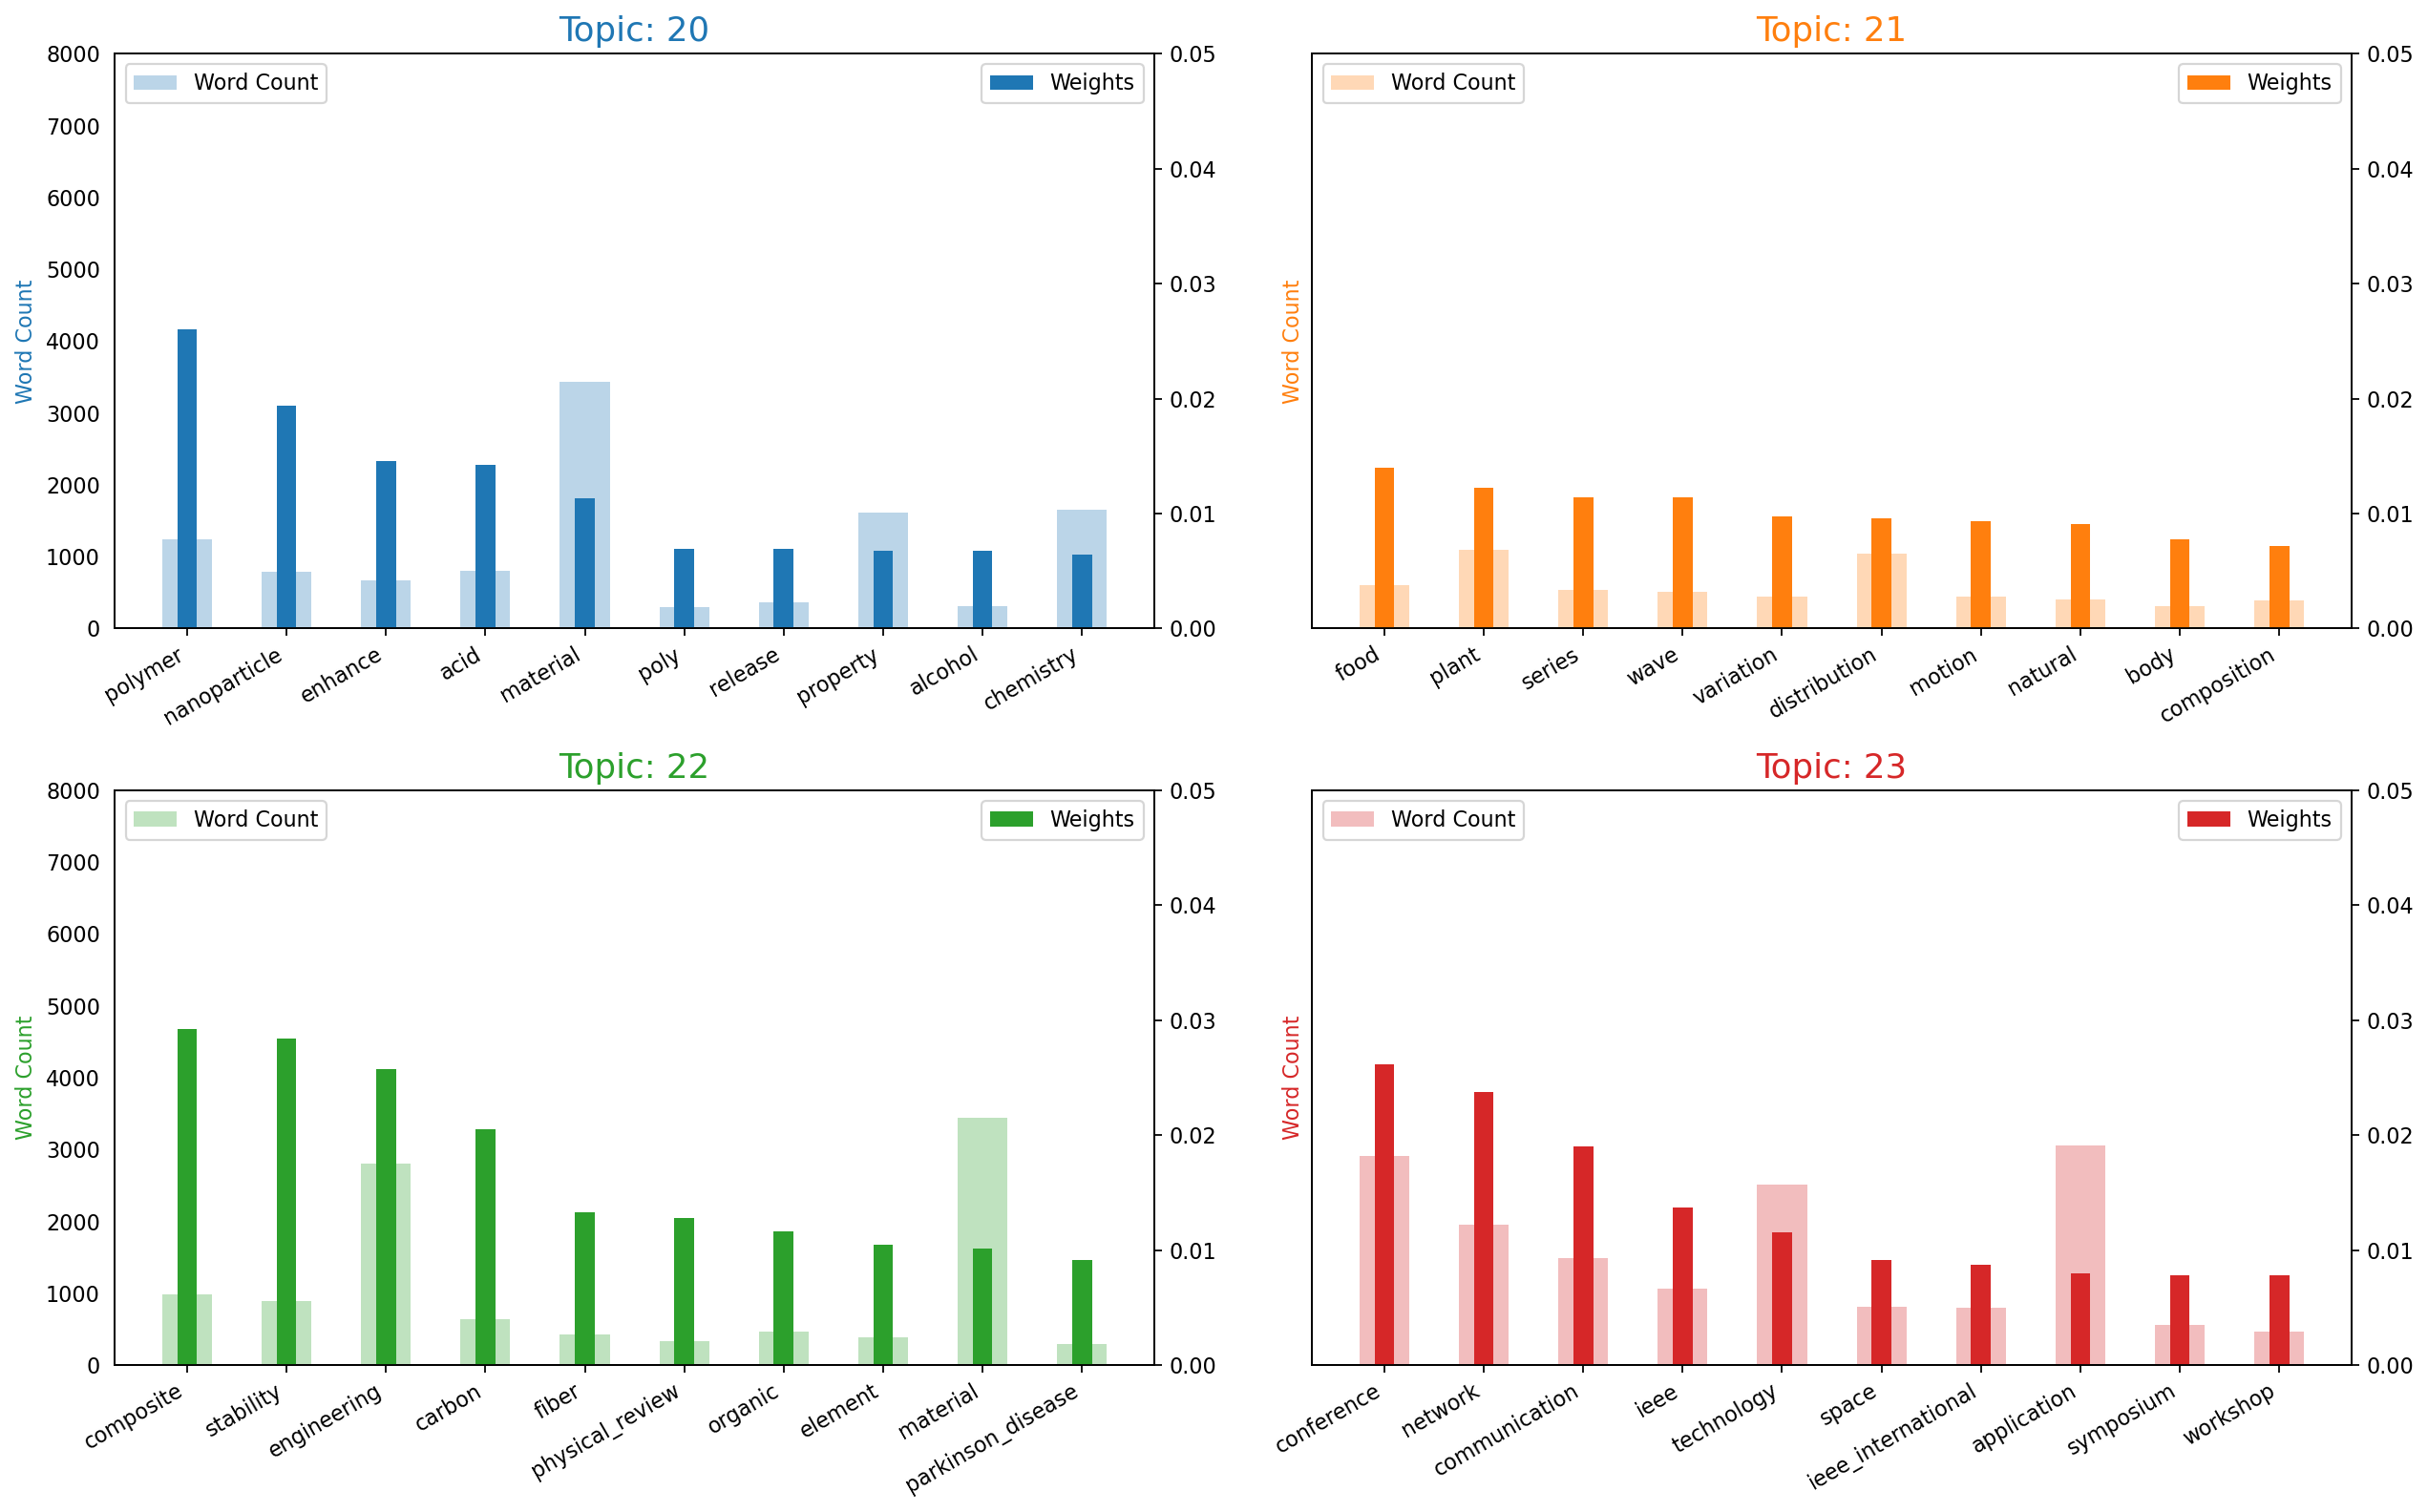

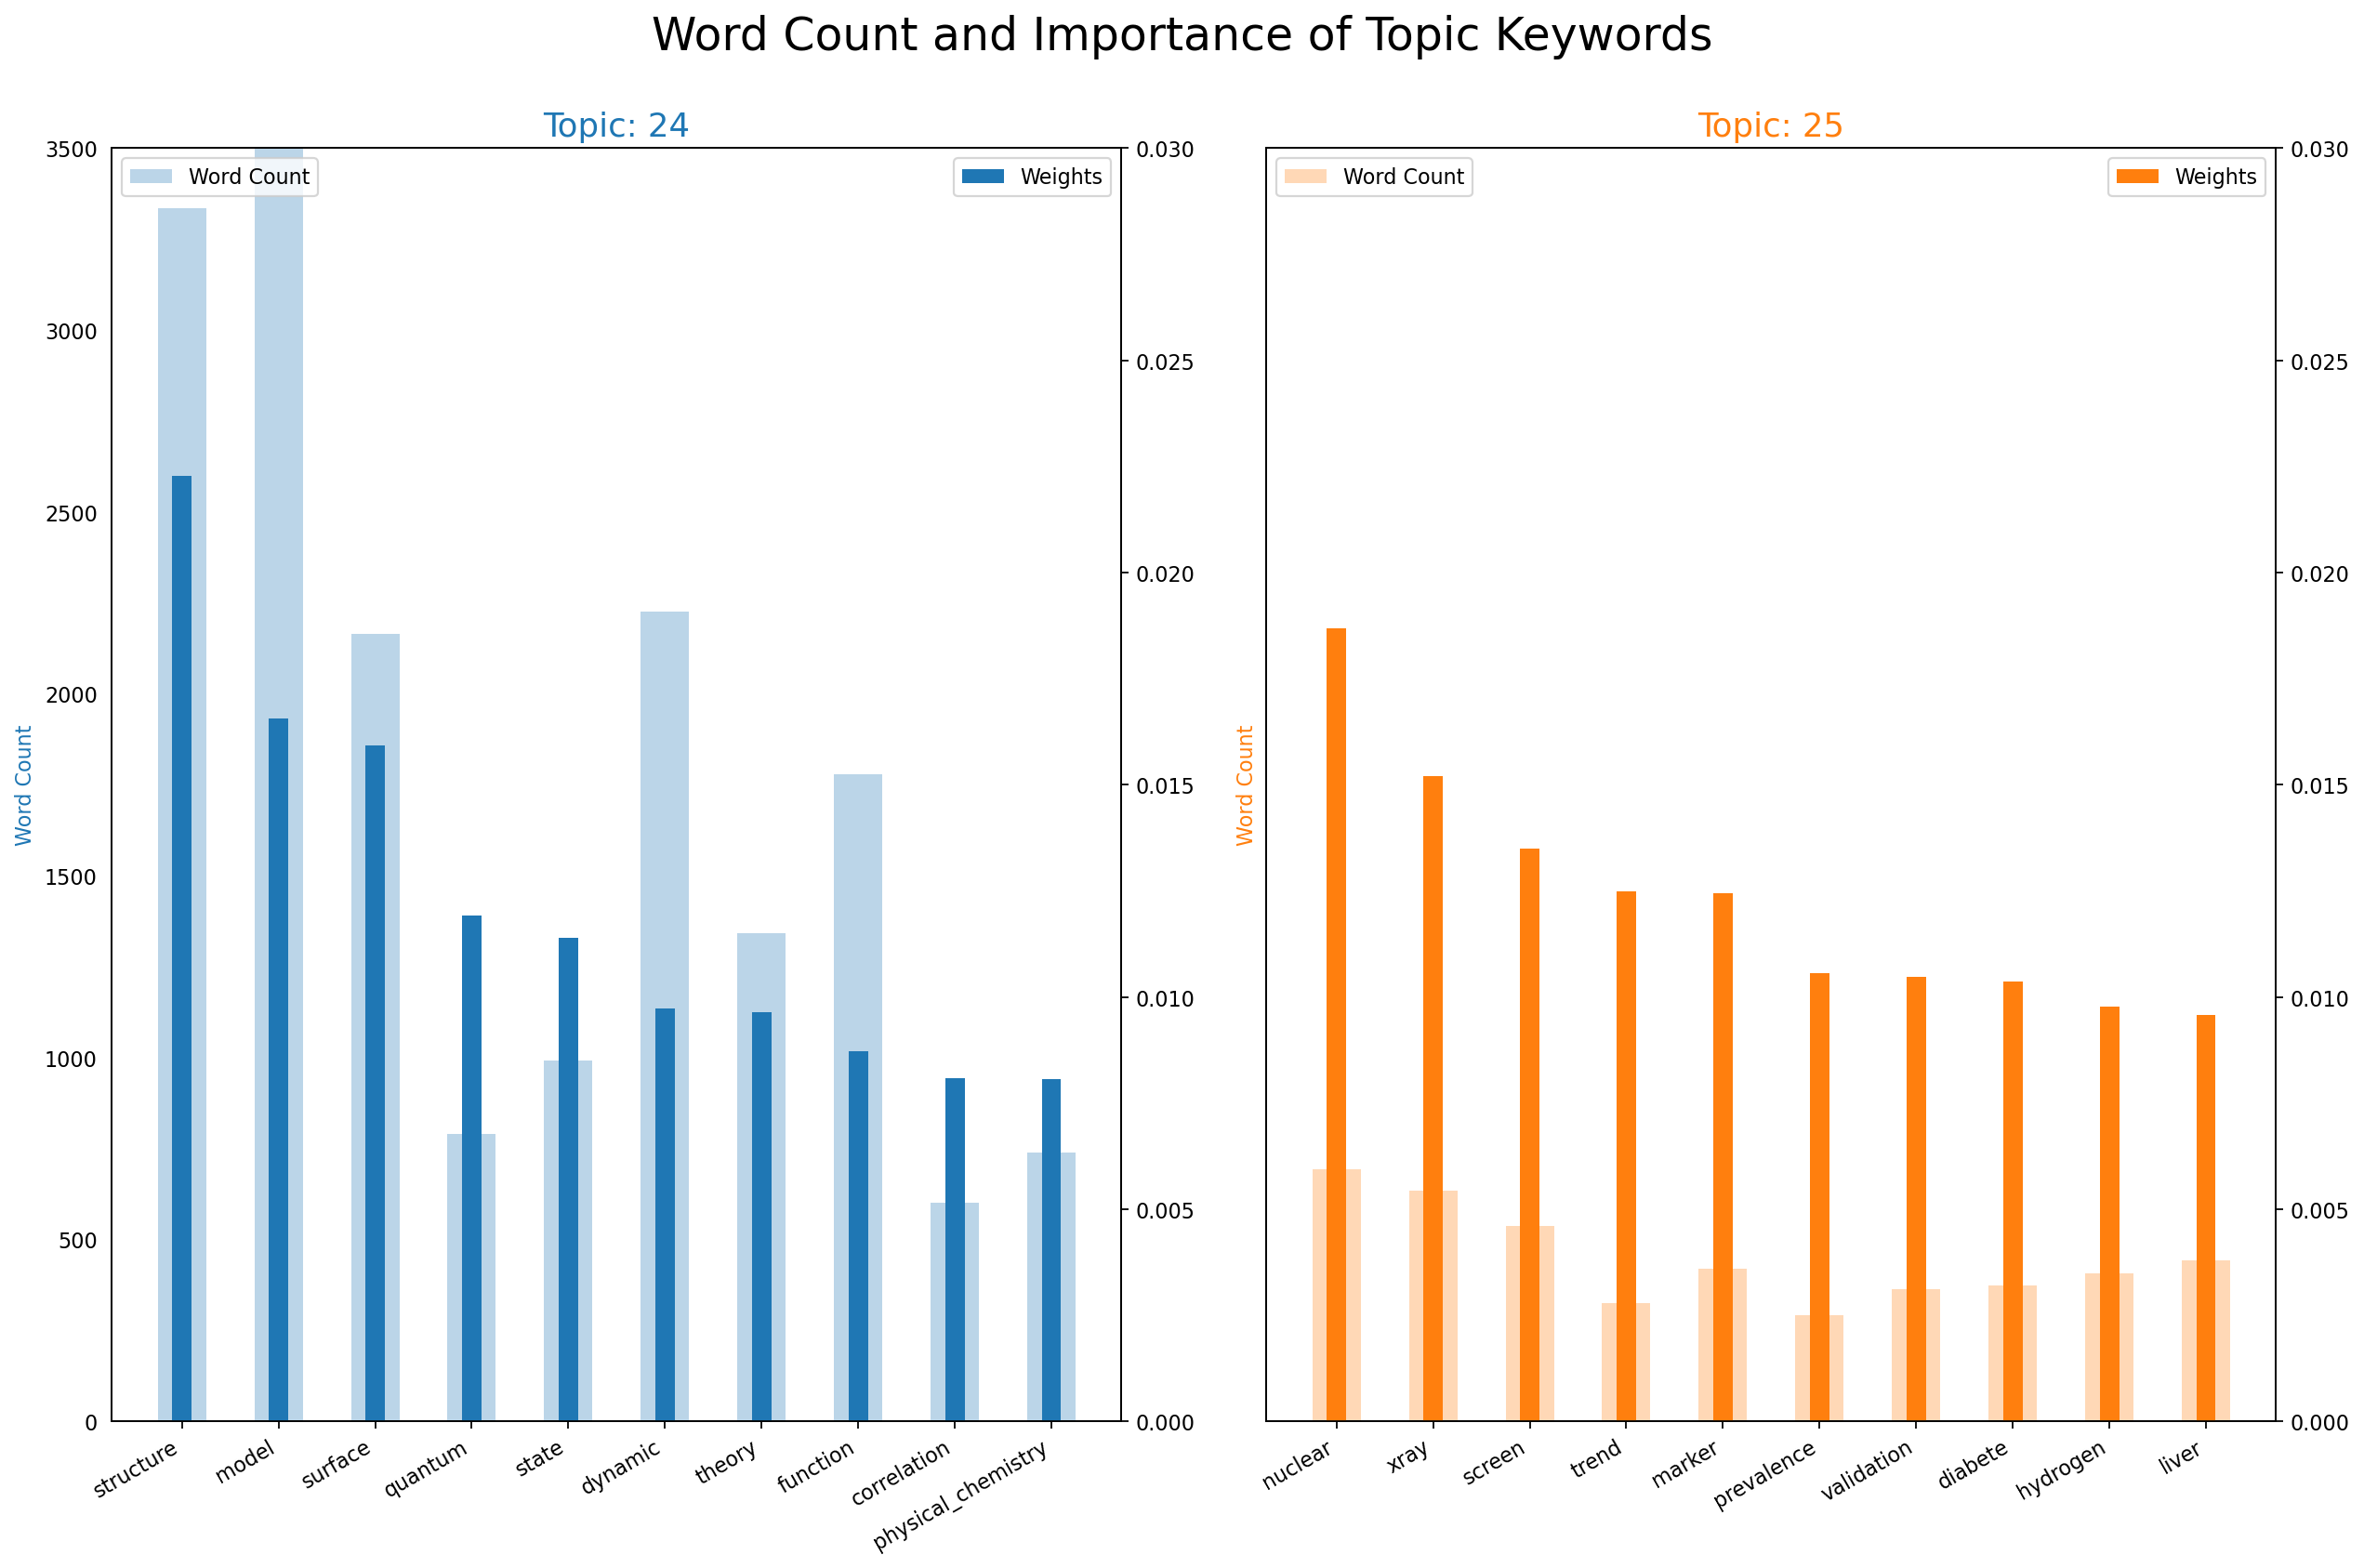

In [113]:
#10.4 Word Counts of Topic Keywords
import matplotlib.colors as mcolors

from collections import Counter
topics = lda_model.show_topics(formatted=False,num_topics=26)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

#NUM_COLORS = 26
#cm = plt.get_cmap('gist_rainbow')
#cols=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
print(df.shape[0])
# Plot Word Count and Weights of Topic Keywords

for n in range (7): 
    if n<6:
        fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
        cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
        for i, ax in enumerate(axes.flatten()):
            ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i+n*4, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
            ax_twin = ax.twinx()
            ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i+n*4, :], color=cols[i], width=0.2, label='Weights')
            ax.set_ylabel('Word Count', color=cols[i])
            ax_twin.set_ylim(0, 0.05); ax.set_ylim(0, 8000)
            ax.set_title('Topic: ' + str(i+n*4), color=cols[i], fontsize=16)
            ax.tick_params(axis='y', left=False)
            ax.set_xticklabels(df.loc[df.topic_id==i+n*4, 'word'], rotation=30, horizontalalignment= 'right')
            ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

            
        fig.tight_layout(w_pad=2)    
        if n==0:
            fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
        plt.show()
        
    else:
        fig, axes = plt.subplots(1,2, figsize=(16,10), sharey=True, dpi=160)
        cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
        for i, ax in enumerate(axes.flatten()):
            ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i+n*4, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
            ax_twin = ax.twinx()
            ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i+n*4, :], color=cols[i], width=0.2, label='Weights')
            ax.set_ylabel('Word Count', color=cols[i])
            ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
            ax.set_title('Topic: ' + str(i+n*4), color=cols[i], fontsize=16)
            ax.tick_params(axis='y', left=False)
            ax.set_xticklabels(df.loc[df.topic_id==i+n*4, 'word'], rotation=30, horizontalalignment= 'right')
            ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

        fig.tight_layout(w_pad=2)    
        fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
        plt.show()        

In [121]:
 # 10.5 most discussed topics in the documents? 
def topics_per_document(model, corpus, start=0, end=100000):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False,num_topics=26) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

In [122]:
df_top3words

,topic_id,words
0,0,"cancer, \npatient, \ndisease"
1,1,"physical_chemistry, \ngrowth, \nchemical_physic"
2,2,"genetic, \nsyndrome, \nnature"
3,3,"management, \nhealth, \nsurgery"
4,4,"network, \ncommunication, \nlaser"
5,5,"group, \nmagnetic, \nmaterial_physic"
6,6,"plasma, \nsequence, \ninfection"
7,7,"membrane, \ncd, \nphysical_review_letter"
8,8,"multiple, \nmedium, \nset"
9,9,"society, \nskin, \nfirst"


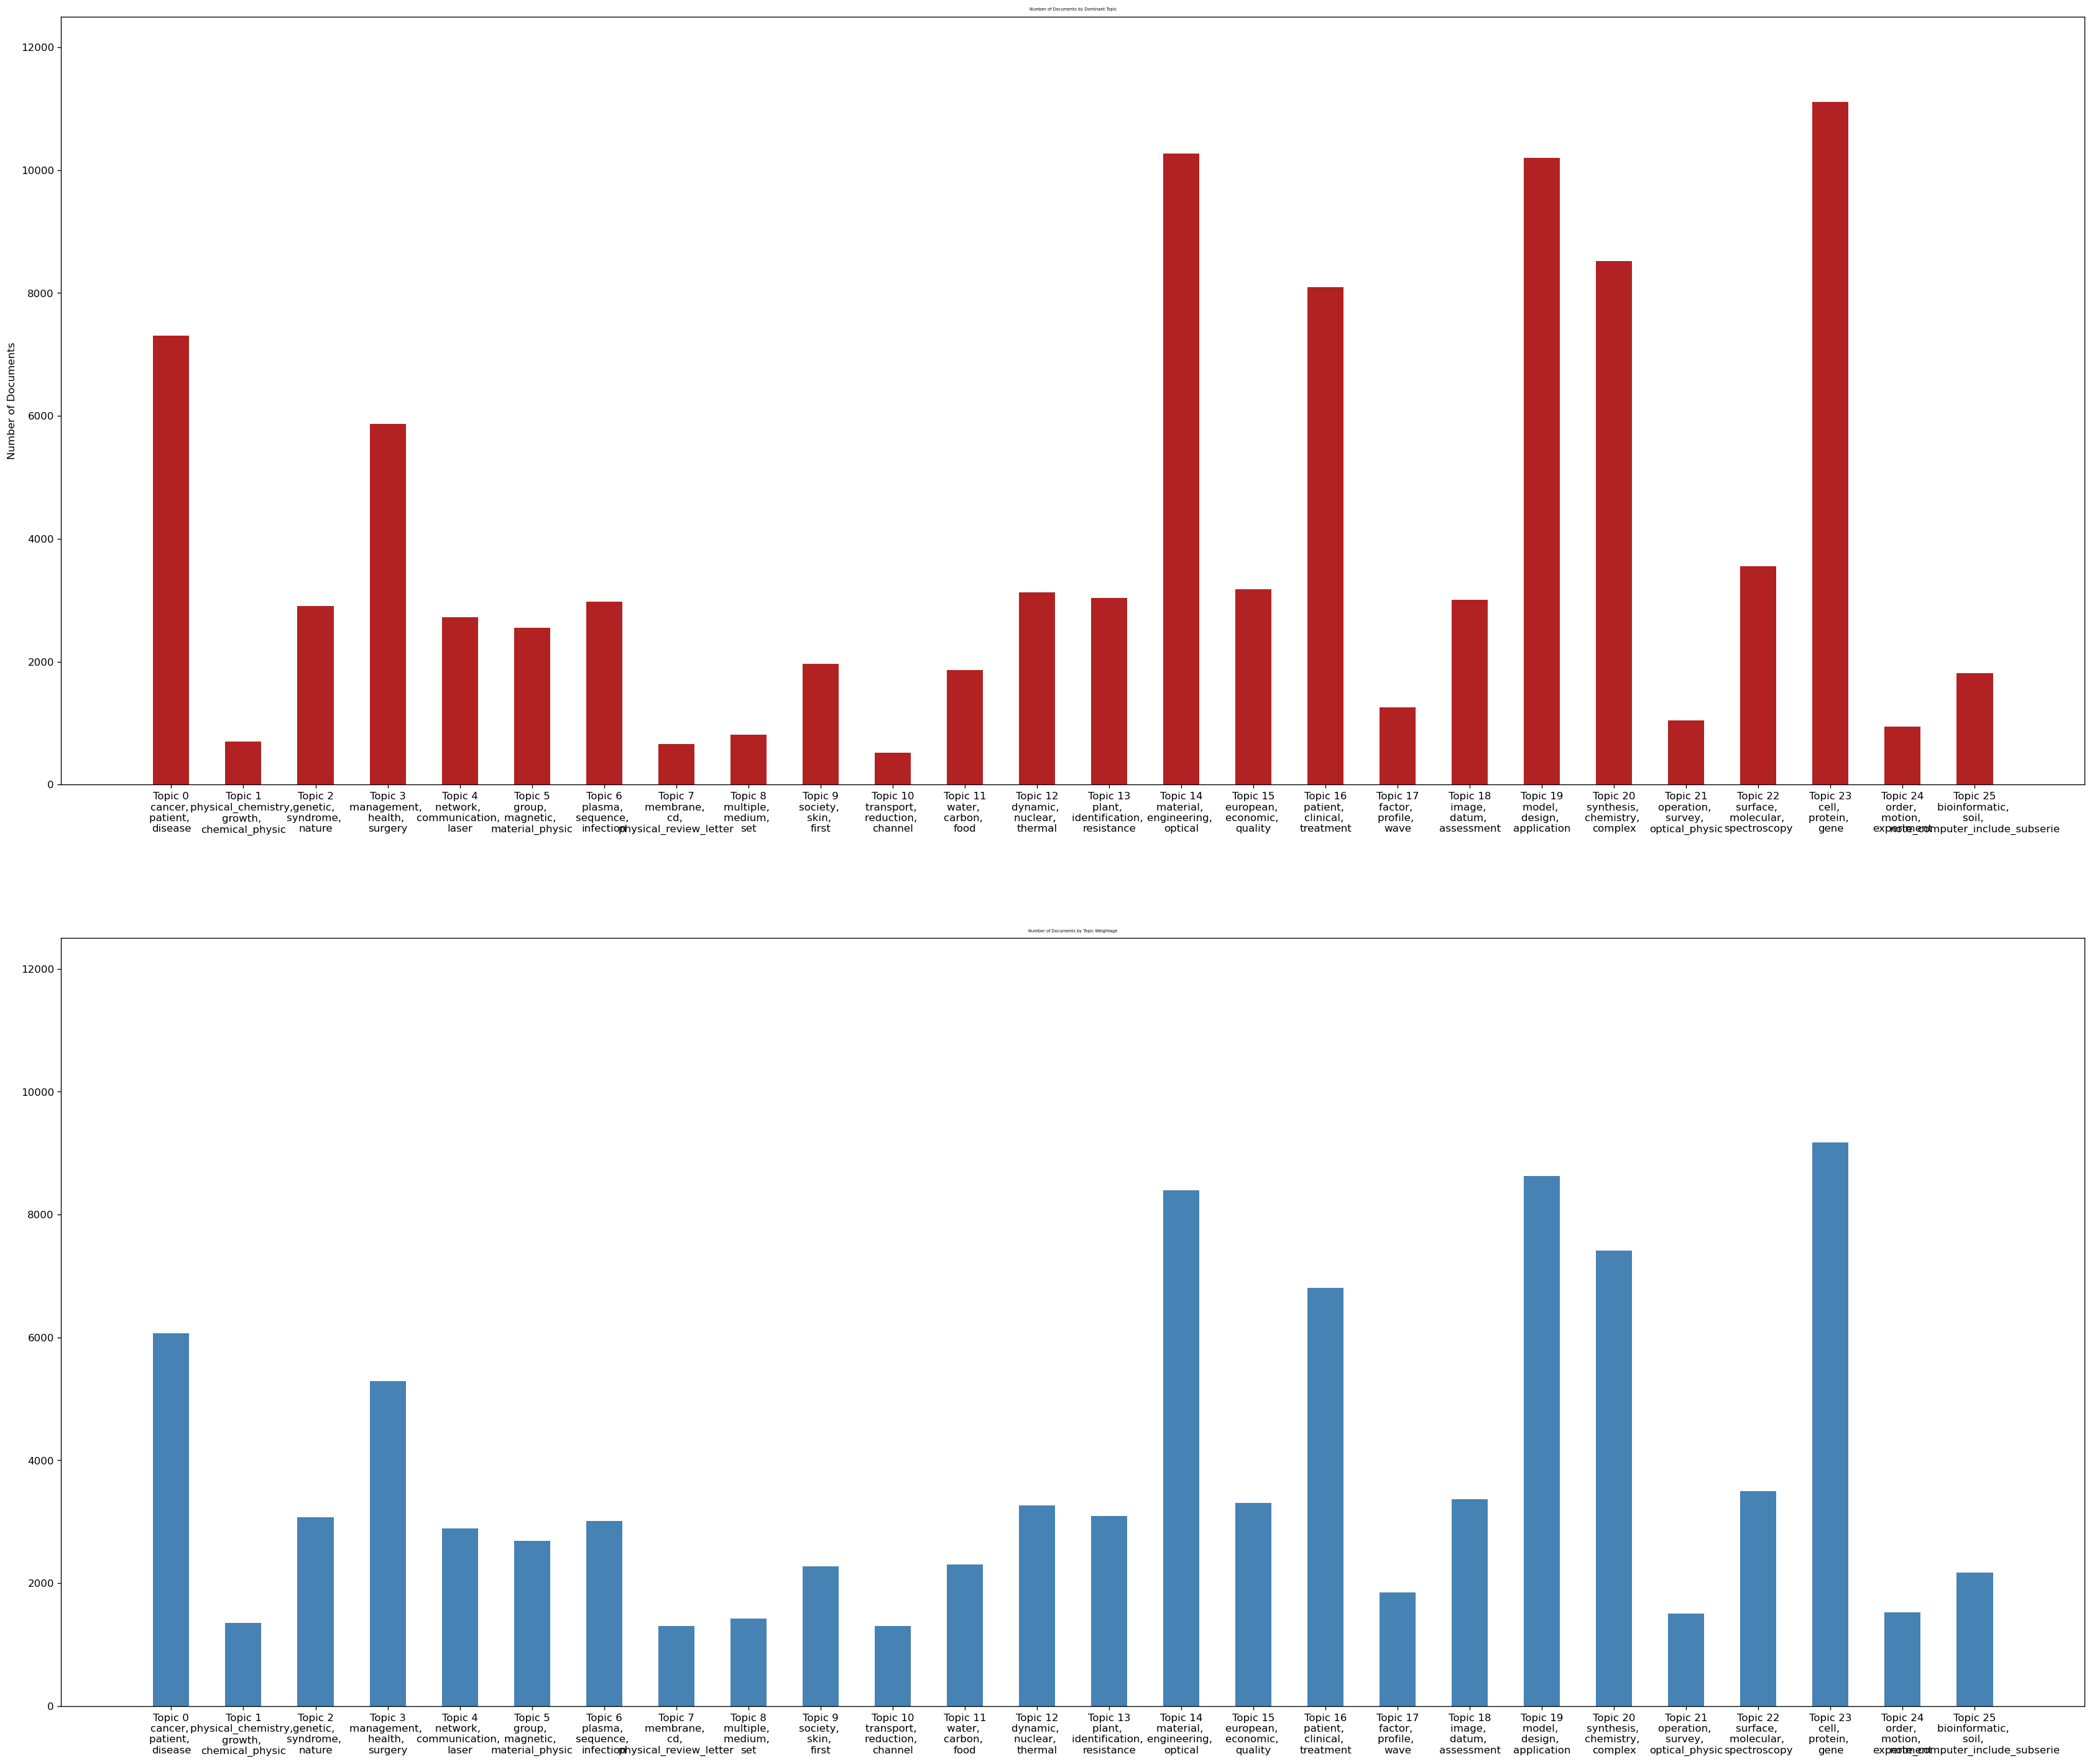

In [132]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(35, 30), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=4))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 12500)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=4))

plt.show()

In [ ]:
#11 used for identidying the topic (LDA as input )

In [133]:
#reload papers
#6002923992,  1304626076,  2651729237,  3891941440,  5380821939
test=papers_ori[(papers_ori["PK_ITEMS"]==6002923992)|(papers_ori["PK_ITEMS"]==1304626076)|(papers_ori["PK_ITEMS"]==2651729237)|(papers_ori["PK_ITEMS"]==3891941440)|(papers_ori["PK_ITEMS"]==5380821939)]
#test=papers_ori.sample(5000)
test.reset_index(inplace=True)
test.drop(columns={'Unnamed: 0','index'},inplace=True)
test

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PK_ITEMS,LANGUAGE_CODE,CODE,Text,Text_processed
0,6002923992,eng,3317,Differential mortality patterns from hydro-meteorological disasters: Evidence from cause-of-death data by age and sex Vienna Yearbook of Population Research,differential mortality patterns from hydrometeorological disasters evidence from causeofdeath data by age and sex vienna yearbook of population research
1,1304626076,eng,1705,"Professional gender gaps across US cities 12th International AAAI Conference on Web and Social Media, ICWSM 2018",professional gender gaps across us cities 12th international aaai conference on web and social media icwsm 2018
2,2651729237,eng,1705,"Demographic differentials in facebook usage around the world Proceedings of the 13th International Conference on Web and Social Media, ICWSM 2019",demographic differentials in facebook usage around the world proceedings of the 13th international conference on web and social media icwsm 2019
3,3891941440,eng,1402;2002;2003;3303,The ABCDE of Big Data: Assessing Biases in Call-Detail Records for Development Estimates World Bank Economic Review Big Data call detail records demographic indicators digital breadcrumbs national statistics sample bias correction,the abcde of big data assessing biases in calldetail records for development estimates world bank economic review big data call detail records demographic indicators digital breadcrumbs national statistics sample bias correction
4,5380821939,eng,1804;2613,The relative importance of frequency of contacts and duration of exposure for the spread of directly transmitted infections Biostatistics Bayesian melding Contact data Italy Parvovirus B19 Time use data Varicella zoster virus,the relative importance of frequency of contacts and duration of exposure for the spread of directly transmitted infections biostatistics bayesian melding contact data italy parvovirus b19 time use data varicella zoster virus


In [20]:
test=papers

test["topic_id"]=0
test["topic_prob"]=0
test["word_length"]=0

train_vecs = []
for i in range(len(test)):
    top_topics = (
        lda_model.get_document_topics(get_corpus(test.iloc[i].Text_processed)[0],minimum_probability=0.0))
    topic_vec = [top_topics[j][1] for j in range(26)] 
    max_prob=max(topic_vec)
    max_id=top_topics[topic_vec.index(max_prob)][0]
    length=len(test.iloc[i].Text_processed)
    
    test.loc[i,"topic_id"]=max_id
    test.loc[i,"topic_prob"]=max_prob
    test.loc[i,"word_length"]=len(test.iloc[i].Text_processed)
test

,AUTHOR_ID_NEW,Text,Text_processed,topic_id,topic_prob,word_length
0,6.503941e+09,"Mothers matter! Maternal support, dominance st...",mothers matter maternal support dominance stat...,4,0.750064,5221
1,6.503994e+09,Lysyl oxidase expression is an independent mar...,lysyl oxidase expression is an independent mar...,13,0.590441,571
2,6.504015e+09,On general features of warm dark matter with r...,on general features of warm dark matter with r...,18,0.579094,4793
3,6.504040e+09,Bringing parliaments back in the sources of po...,bringing parliaments back in the sources of po...,12,0.918855,5046
4,6.504121e+09,An experimental and numerical investigation on...,an experimental and numerical investigation on...,6,0.481778,2326
...,...,...,...,...,...,...
19356,5.721629e+10,Resistance of Escherichia coli and Salmonella ...,resistance of escherichia coli and salmonella ...,3,0.437434,192
19357,5.721629e+10,Effect of ecological factors on the inhibitory...,effect of ecological factors on the inhibitory...,18,0.008336,178
19358,5.721629e+10,Effect of bacteriocin-producing lactobacilli o...,effect of bacteriocinproducing lactobacilli on...,3,0.157004,303
19359,5.721629e+10,The first low molecular weight antibiotic from...,the first low molecular weight antibiotic from...,16,0.364807,229


In [21]:
author_Topic=test.drop(columns={"Text","Text_processed","word_length"})

author_Topic["Dominant_Topic_new"]=author_Topic.apply(lambda row:30 if row["topic_prob"]<0.3 else row["topic_id"], axis=1)

In [22]:
dic_1= {
30: "Multidisciplinary",
4:"Agricultural, Biological Sciences and Environmental Science",
9:"Agricultural, Biological Sciences and Environmental Science",
27:"Agricultural, Biological Sciences and Environmental Science",
5:"Biochemistry, Genetics and Molecular Biology",
13:"Biochemistry, Genetics and Molecular Biology",
15:"Chemistry and Chemical Engineering",
16:"Chemistry and Chemical Engineering",
7:"Computer Science",
0:"Earth and Planetary Sciences",
18:"Earth and Planetary Sciences",
23:"Earth and Planetary Sciences",
12:"Economics and Social Science",
6:"Engineering",
19:"Engineering",
20:"Energy",
28:"Health Professions",
3:"Immunology and Microbiology",
1:"Materials Science",
14:"Materials Science",
25:"Mathematics",
2:"Medicine",
8:"Medicine",
17:"Medicine",
26:"Medicine",
10:"Neuroscience",
21:"Pharmacology, Toxicology and Pharmaceutics",
11:"Physics and Astronomy",
22:"Physics and Astronomy",
29:"Physics and Astronomy",
24:"Psychology"
     }
author_Topic["Topic"]=author_Topic["Dominant_Topic_new"]
author_Topic=author_Topic.replace({"Topic": dic_1})
author_Topic.drop(columns={"topic_id"},inplace=True)

In [23]:
author_Topic.to_csv('N:/Bibliometric_Germany/KB data/processed/new_2021_April/11_author_discipline_LDA_add.csv', encoding=encoding)

In [24]:
# just for fun.....

import sympy

from sympy import * 
from scipy.stats import linregress


    
x, y = symbols('x y')

def grad_form(y,x): 
    
    g=sympy.diff(y,x)
    
    return g
func=x**2+1
grad_form(func,x)

In [58]:
import numpy as np

def grad (start): 
    x = mgrid[start:start+1:0.1]

    V = x**2  

    Ex= gradient(V)
    
    return Ex

def gradient_descent(start, learn_rate, n_iter=5000, tolerance=1e-06):
    vector = start
    for _ in range(n_iter):
        gradient=grad(vector)[0]
        diff = -learn_rate * gradient
        if np.all(np.abs(diff) <= tolerance):
            break
        vector += diff
    return vector

gradient_descent(start=-1, learn_rate=0.2)

-0.05002432052594351